In [549]:
import pickle
import requests
from bs4 import BeautifulSoup
import time
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
import os
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import diagnostic_plots
import unicodedata

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cross_validation import KFold
from sklearn.model_selection import learning_curve
%matplotlib inline

with open('all_top40.pkl', 'rb') as picklefile:
    df2 = pickle.load(picklefile)

In [550]:
df2 = df2[df2['Pos'] != '1']

In [551]:
df2 = df2[(df2['Total_games_played'] > 100) & (df2['OPS'] < 1) & (df2['Salary'] > 500000) & (df2['Age'] > 23)]

In [552]:
df2.Age.describe()

count    274.000000
mean      28.525547
std        3.241400
min       24.000000
25%       26.000000
50%       28.000000
75%       31.000000
max       38.000000
Name: Age, dtype: float64

In [553]:
df2.columns

Index(['index', 'Games_Played', 'Plate_Appearances', 'At_Bats', 'Runs', 'Hits',
       '2B', '3B', 'HR', 'RBI', 'BA', 'OBP', 'SLG', 'OPS', 'SB', 'BB', 'SO',
       'TB', 'HBP', 'SF', 'dWAR', 'Salary', 'Adj_Salary', 'Age',
       'All_star_count', 'Total_games_played', 'Team', 'Pos'],
      dtype='object')

Text(0.5,1,'Games_Played')

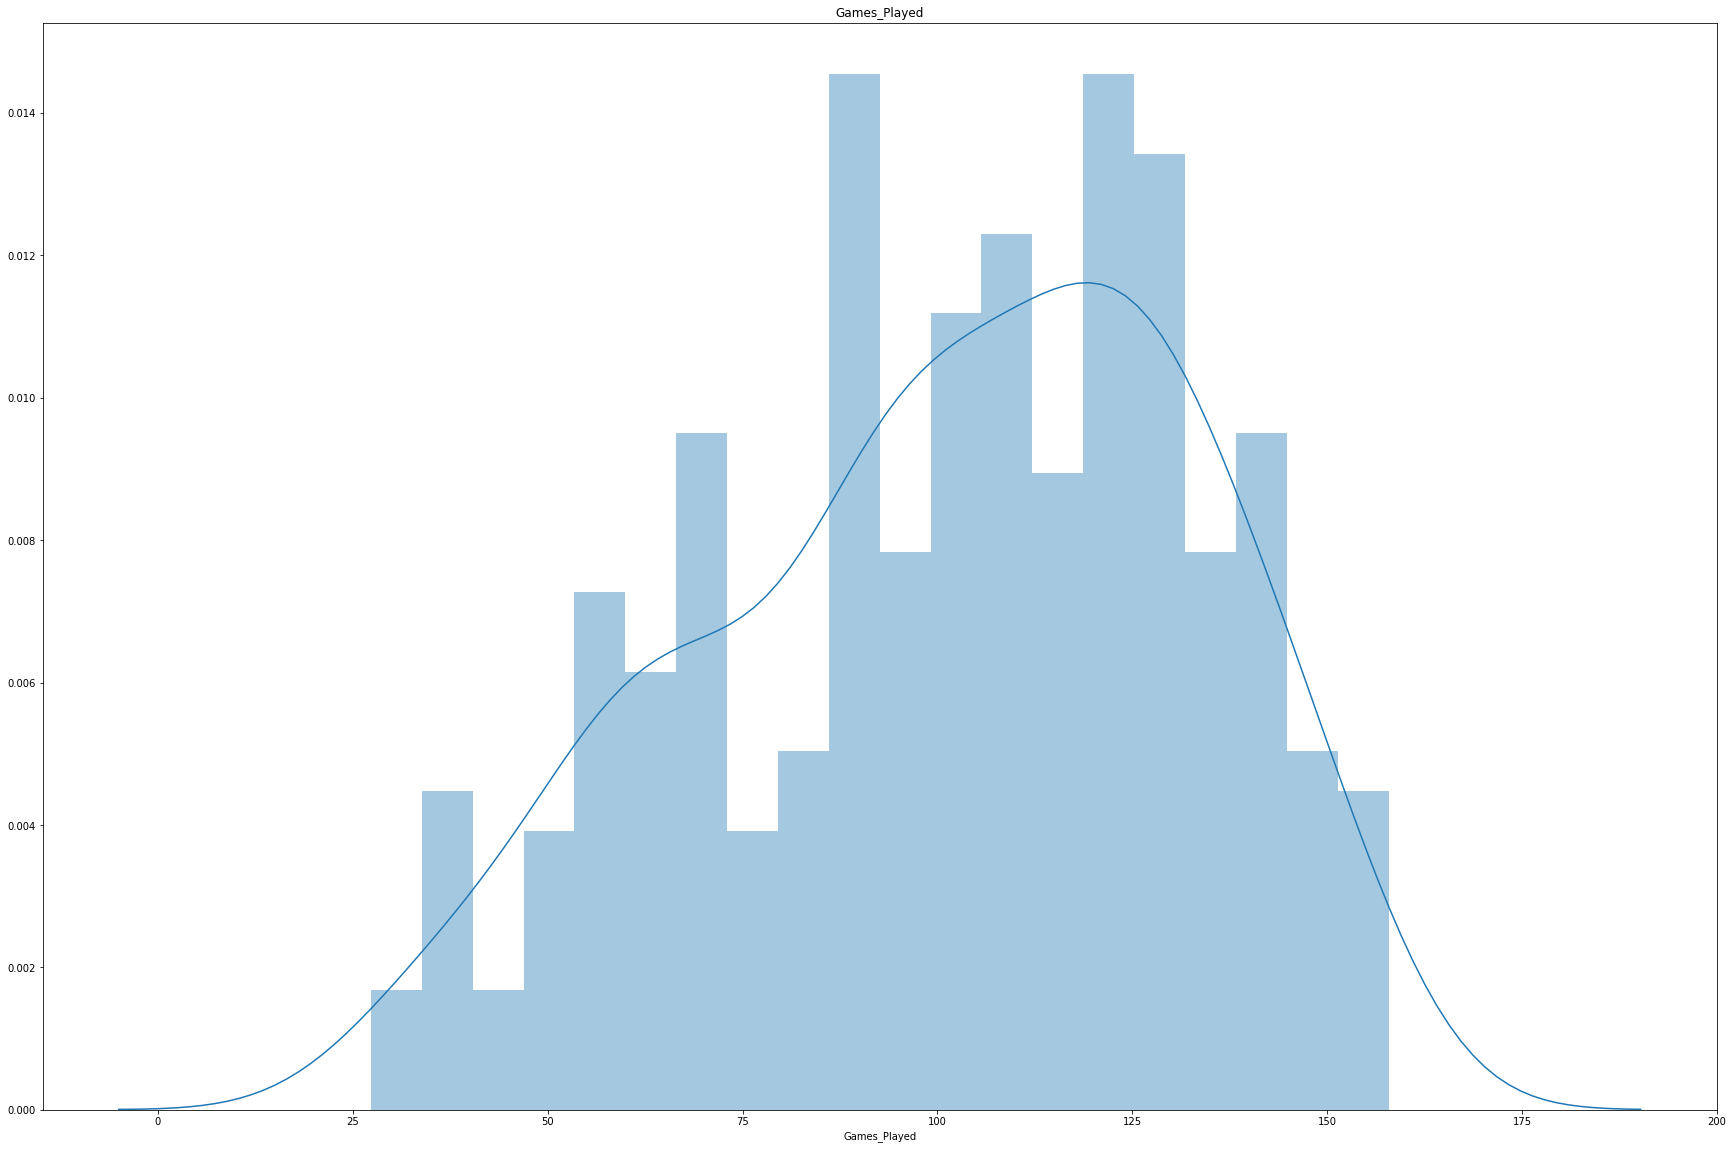

In [554]:
#Create a 2 x 3 plot matrix
fig = plt.figure(figsize = (30, 20))

#Distribution of years
plt.subplot(1, 1, 1)
sns.distplot(df2["Games_Played"], bins = 20); 
plt.title('Games_Played')

Text(0.5,1,'RBI')

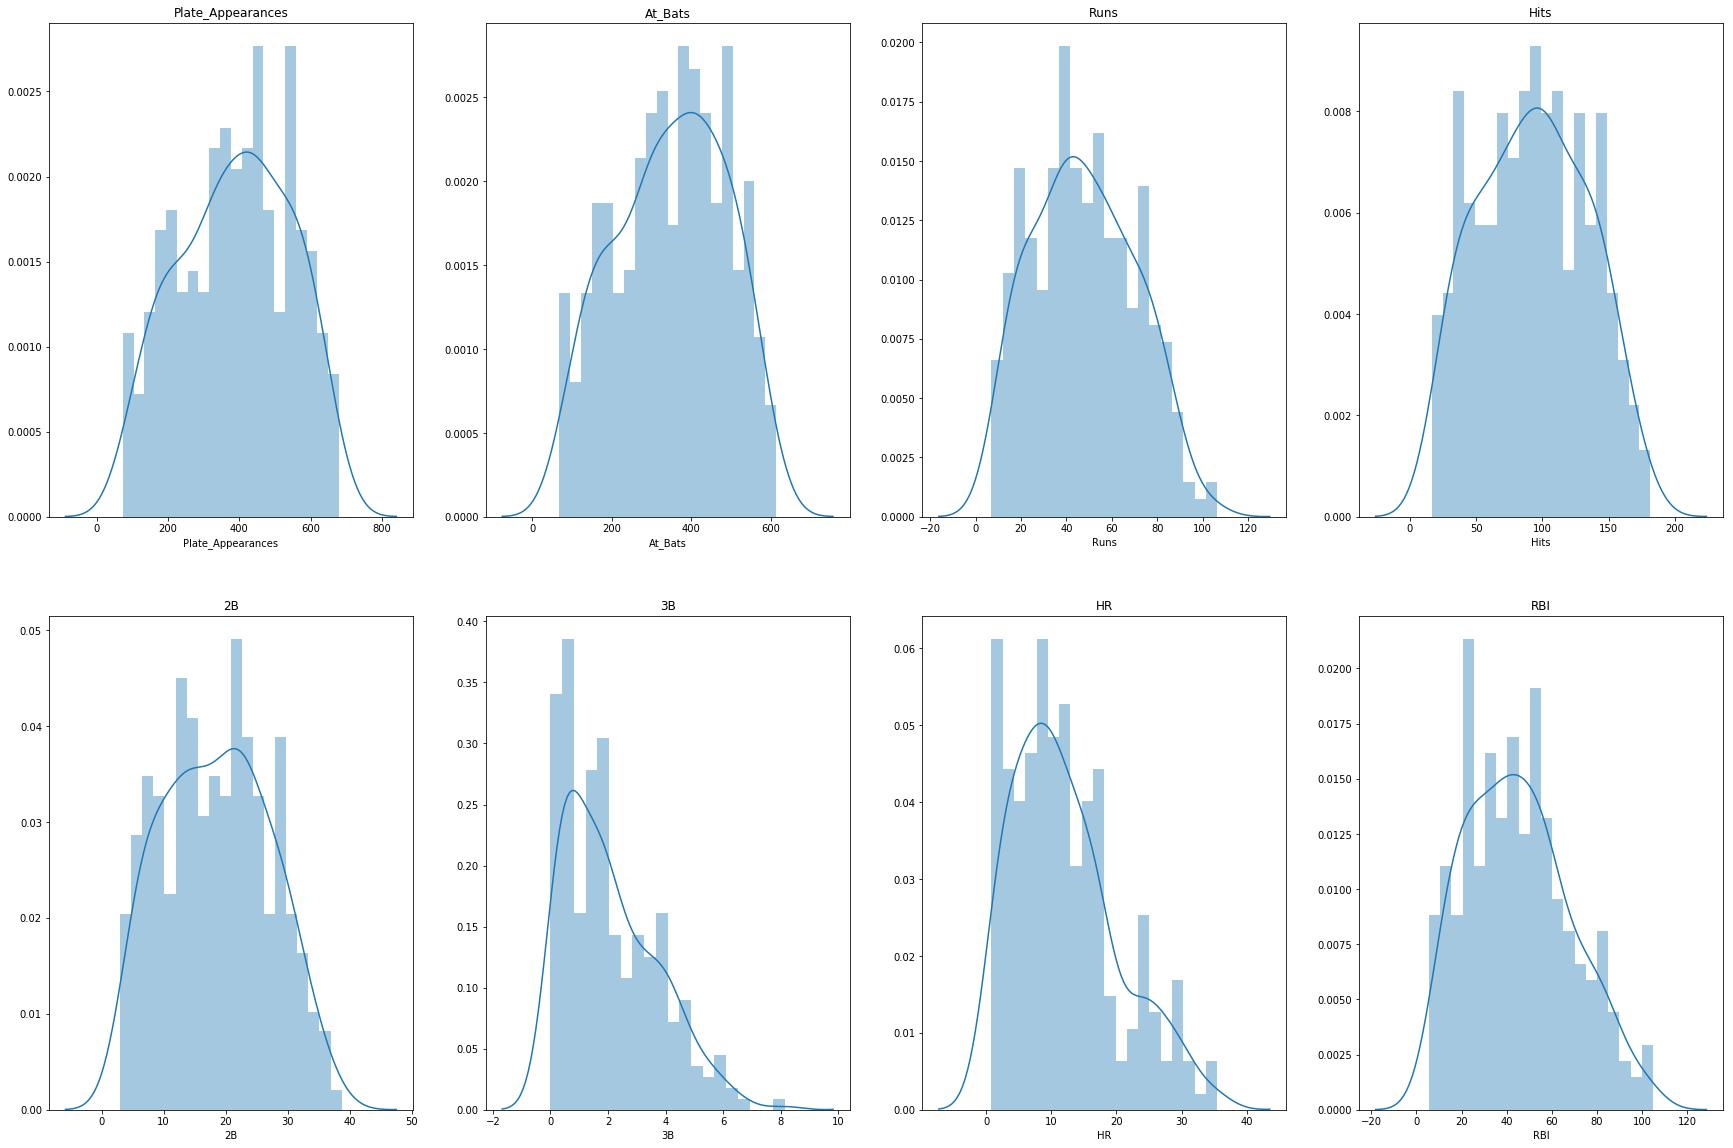

In [555]:
#Create a 2 x 3 plot matrix
fig = plt.figure(figsize = (30, 20))

#Distribution of years
plt.subplot(2, 4, 1)
sns.distplot(df2["Plate_Appearances"], bins = 20); 
plt.title('Plate_Appearances')

#Distribution of years
plt.subplot(2, 4, 2)
sns.distplot(df2["At_Bats"], bins = 20); 
plt.title('At_Bats')

#Distribution of years
plt.subplot(2, 4, 3)
sns.distplot(df2["Runs"], bins = 20); 
plt.title('Runs')

#Distribution of years
plt.subplot(2, 4, 4)
sns.distplot(df2["Hits"], bins = 20); 
plt.title('Hits')

#Distribution of years
plt.subplot(2, 4, 5)
sns.distplot(df2["2B"], bins = 20); 
plt.title('2B')

#Distribution of years
plt.subplot(2, 4, 6)
sns.distplot(df2["3B"], bins = 20); 
plt.title('3B')

#Distribution of years
plt.subplot(2, 4, 7)
sns.distplot(df2["HR"], bins = 20); 
plt.title('HR')

#Distribution of years
plt.subplot(2, 4, 8)
sns.distplot(df2["RBI"], bins = 20); 
plt.title('RBI')


Text(0.5,1,'TB')

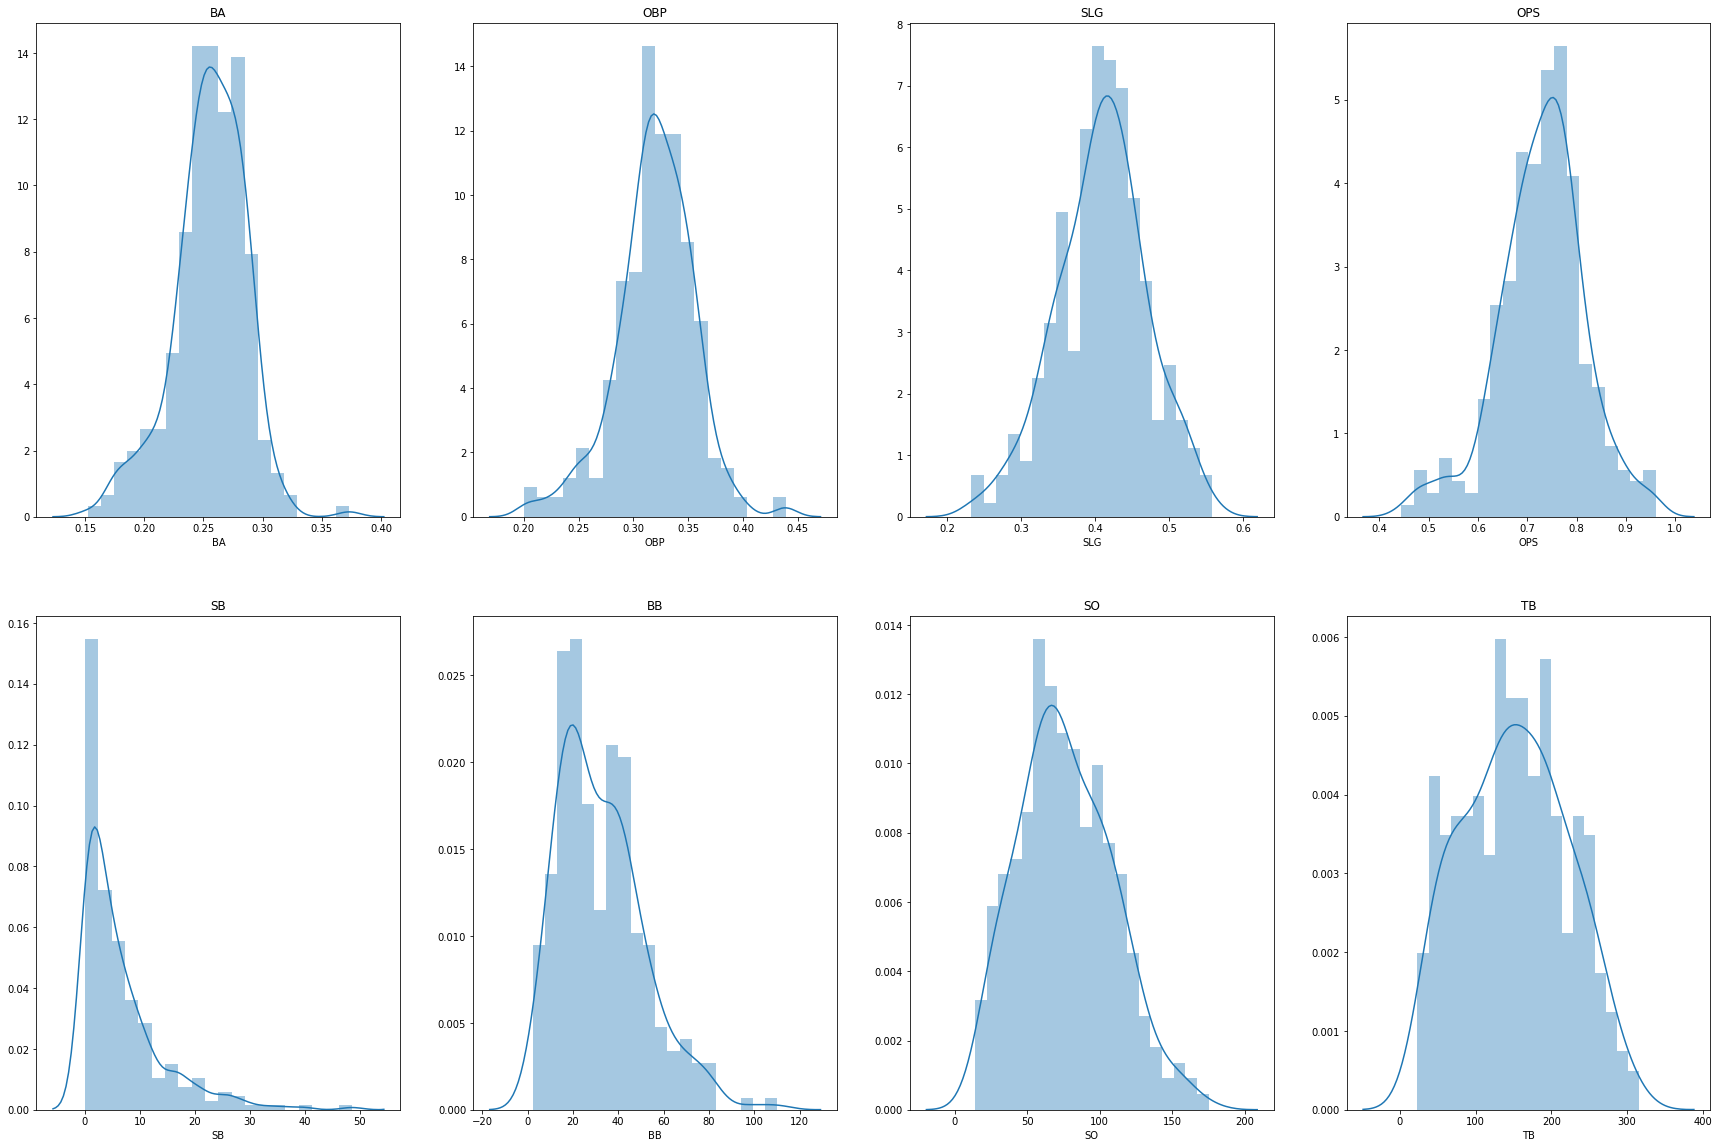

In [556]:
#Create a 2 x 3 plot matrix
fig = plt.figure(figsize = (30, 20))

#Distribution of years
plt.subplot(2, 4, 1)
sns.distplot(df2["BA"], bins = 20); 
plt.title('BA')

#Distribution of years
plt.subplot(2, 4, 2)
sns.distplot(df2["OBP"], bins = 20); 
plt.title('OBP')

#Distribution of years
plt.subplot(2, 4, 3)
sns.distplot(df2["SLG"], bins = 20); 
plt.title('SLG')

#Distribution of years
plt.subplot(2, 4, 4)
sns.distplot(df2["OPS"], bins = 20); 
plt.title('OPS')

#Distribution of years
plt.subplot(2, 4, 5)
sns.distplot(df2["SB"], bins = 20); 
plt.title('SB')

#Distribution of years
plt.subplot(2, 4, 6)
sns.distplot(df2["BB"], bins = 20); 
plt.title('BB')

#Distribution of years
plt.subplot(2, 4, 7)
sns.distplot(df2["SO"], bins = 20); 
plt.title('SO')

#Distribution of years
plt.subplot(2, 4, 8)
sns.distplot(df2["TB"], bins = 20); 
plt.title('TB')

In [557]:
df2[df2['dWAR'] > 3]

,index,Games_Played,Plate_Appearances,At_Bats,Runs,Hits,2B,3B,HR,RBI,...,HBP,SF,dWAR,Salary,Adj_Salary,Age,All_star_count,Total_games_played,Team,Pos
Player_Name,,,,,,,,,,,,,,,,,,,,,
Andrelton Simmons,48.0,130.166667,521.5,480.666667,53.666667,127.0,22.666667,3.0,8.166667,46.833333,...,2.5,3.833333,3.683333,11000000.0,1.616014,27,0.0,781,LAA,6


Text(0.5,1,'Total_games_played')

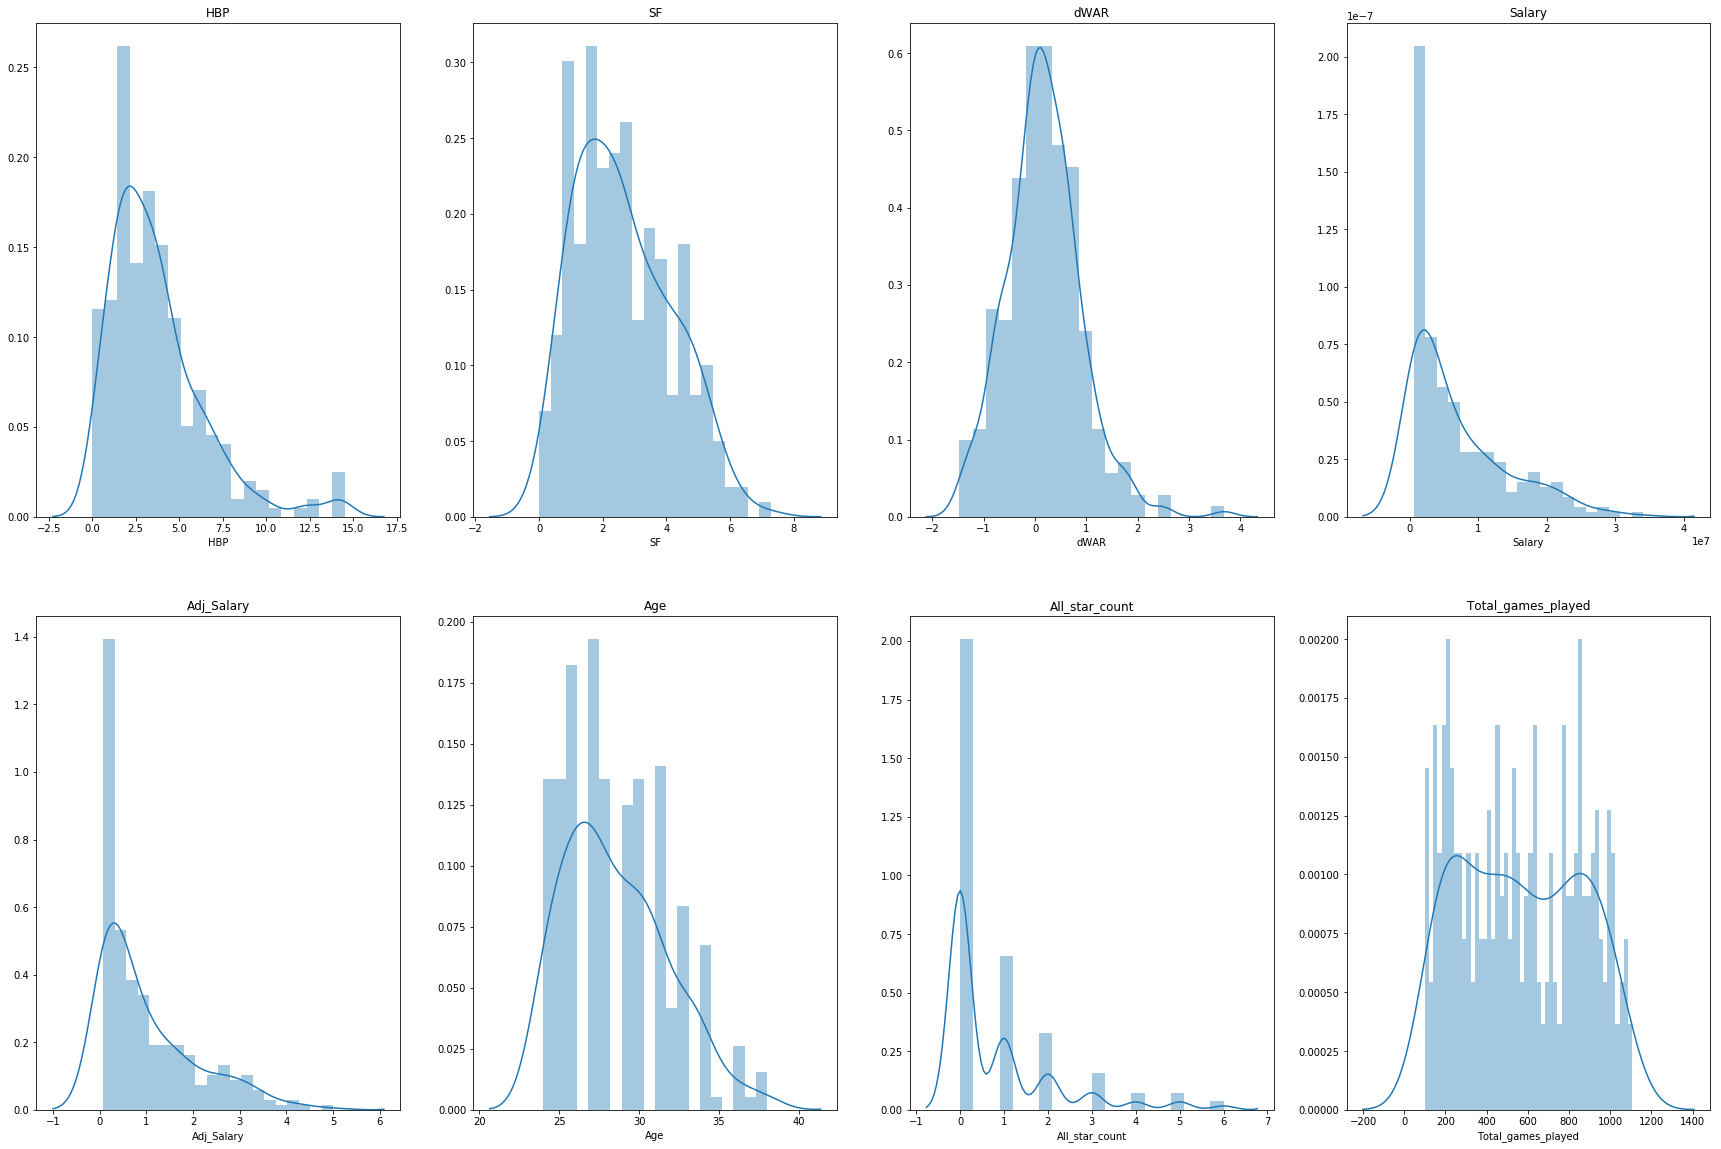

In [558]:
#Create a 2 x 3 plot matrix
fig = plt.figure(figsize = (30, 20))

#Distribution of years
plt.subplot(2, 4, 1)
sns.distplot(df2["HBP"], bins = 20); 
plt.title('HBP')

#Distribution of years
plt.subplot(2, 4, 2)
sns.distplot(df2["SF"], bins = 20); 
plt.title('SF')

#Distribution of years
plt.subplot(2, 4, 3)
sns.distplot(df2["dWAR"], bins = 20); 
plt.title('dWAR')

#Distribution of years
plt.subplot(2, 4, 4)
sns.distplot(df2["Salary"], bins = 20); 
plt.title('Salary')

#Distribution of years
plt.subplot(2, 4, 5)
sns.distplot(df2["Adj_Salary"], bins = 20); 
plt.title('Adj_Salary')

#Distribution of years
plt.subplot(2, 4, 6)
sns.distplot(df2["Age"], bins = 20); 
plt.title('Age')

#Distribution of years
plt.subplot(2, 4, 7)
sns.distplot(df2["All_star_count"], bins = 20); 
plt.title('All_star_count')

#Distribution of years
plt.subplot(2, 4, 8)
sns.distplot(df2["Total_games_played"], bins = 50); 
plt.title('Total_games_played')

In [760]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 274 entries, A.J. Ellis to Yuli Gurriel
Data columns (total 28 columns):
index                 274 non-null float64
Games_Played          274 non-null float64
Plate_Appearances     274 non-null float64
At_Bats               274 non-null float64
Runs                  274 non-null float64
Hits                  274 non-null float64
2B                    274 non-null float64
3B                    274 non-null float64
HR                    274 non-null float64
RBI                   274 non-null float64
BA                    274 non-null float64
OBP                   274 non-null float64
SLG                   274 non-null float64
OPS                   274 non-null float64
SB                    274 non-null float64
BB                    274 non-null float64
SO                    274 non-null float64
TB                    274 non-null float64
HBP                   274 non-null float64
SF                    274 non-null float64
dWAR                  

In [559]:
## SET UP FINAL TRAIN/TEST

y = df2.Salary
X = df2.drop(['Salary'],1)
X_train, X_FINALTEST, y_train, y_FINALTEST = train_test_split(X, y, test_size=0.3, random_state=55)

In [560]:
df3 = X_train.copy(deep=True)

In [561]:
df3_y = pd.DataFrame(y_train)

In [562]:
df3_y.reset_index(inplace=True)

In [563]:
## CREATE FULL TRAINING DATASET

df3.reset_index(inplace=True)

df3 = pd.merge(df3, df3_y)

df3 = df3.set_index('Player_Name')

In [564]:
df3

,index,Games_Played,Plate_Appearances,At_Bats,Runs,Hits,2B,3B,HR,RBI,...,HBP,SF,dWAR,Adj_Salary,Age,All_star_count,Total_games_played,Team,Pos,Salary
Player_Name,,,,,,,,,,,,,,,,,,,,,
Cameron Maybin,139.0,106.000000,407.714286,367.714286,53.285714,94.428571,15.714286,3.714286,6.142857,34.571429,...,2.000000,1.571429,0.100000,0.477459,30,0.0,742,MIA,7,3250000.0
Justin Turner,480.0,116.142857,401.714286,356.000000,47.571429,103.714286,24.142857,1.000000,11.285714,50.000000,...,8.714286,3.428571,0.257143,1.762925,32,1.0,813,LAD,5,12000000.0
Austin Romine,78.0,36.500000,101.833333,93.833333,9.166667,20.666667,5.000000,0.166667,1.166667,9.666667,...,0.500000,1.166667,0.033333,0.161601,28,0.0,219,NYY,2,1100000.0
Dustin Pedroia,264.0,135.285714,610.428571,544.285714,77.571429,162.142857,32.142857,1.428571,12.285714,67.285714,...,2.000000,5.142857,1.514286,2.350566,33,1.0,947,BOS,4,16000000.0
Corey Dickerson,198.0,112.600000,420.400000,390.400000,55.400000,109.200000,25.400000,4.000000,18.000000,51.200000,...,1.200000,2.000000,-0.700000,0.874117,28,1.0,563,PIT,7,5950000.0
Khris Davis,499.0,124.800000,480.800000,430.000000,65.400000,106.800000,23.000000,1.400000,29.000000,74.800000,...,6.000000,4.400000,-0.960000,1.542559,29,0.0,624,OAK,D,10500000.0
Jesus Sucre,401.0,30.000000,91.200000,83.000000,7.600000,19.000000,3.200000,0.000000,1.800000,9.800000,...,1.000000,1.000000,0.280000,0.135892,29,0.0,150,TBR,2,925000.0
Ben Zobrist,84.0,145.285714,622.285714,536.428571,82.142857,143.428571,34.571429,4.000000,15.000000,67.142857,...,2.857143,5.000000,0.557143,2.424022,36,2.0,1017,CHC,4,16500000.0
DJ LeMahieu,210.0,118.142857,459.714286,416.000000,58.714286,125.571429,18.714286,4.142857,4.857143,41.000000,...,1.857143,2.857143,1.085714,1.248738,28,2.0,827,COL,4,8500000.0


In [565]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 191 entries, Cameron Maybin to Jurickson Profar
Data columns (total 28 columns):
index                 191 non-null float64
Games_Played          191 non-null float64
Plate_Appearances     191 non-null float64
At_Bats               191 non-null float64
Runs                  191 non-null float64
Hits                  191 non-null float64
2B                    191 non-null float64
3B                    191 non-null float64
HR                    191 non-null float64
RBI                   191 non-null float64
BA                    191 non-null float64
OBP                   191 non-null float64
SLG                   191 non-null float64
OPS                   191 non-null float64
SB                    191 non-null float64
BB                    191 non-null float64
SO                    191 non-null float64
TB                    191 non-null float64
HBP                   191 non-null float64
SF                    191 non-null float64
dWAR          

In [566]:
X=patsy.dmatrix('Pos',data=df3,return_type='dataframe')
X.head()

,Intercept,Pos[T.3],Pos[T.4],Pos[T.5],Pos[T.6],Pos[T.7],Pos[T.8],Pos[T.9],Pos[T.D]
Player_Name,,,,,,,,,
Cameron Maybin,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
Justin Turner,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
Austin Romine,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Dustin Pedroia,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Corey Dickerson,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [567]:
df3=df3.join(X)

In [568]:
df3['First_Base'] = df3['Pos[T.3]']
df3['Second_Base'] = df3['Pos[T.4]']
df3['Third_Base'] = df3['Pos[T.5]']
df3['Shortstop'] = df3['Pos[T.6]']
df3['Left_Field'] = df3['Pos[T.7]']
df3['Center_Field'] = df3['Pos[T.8]']
df3['Right_Field'] = df3['Pos[T.9]']
df3['DH'] = df3['Pos[T.D]']

df3 = df3.drop(['Pos[T.3]','Pos[T.4]','Pos[T.5]','Pos[T.6]','Pos[T.7]','Pos[T.8]','Pos[T.9]','Pos[T.D]'],1)

df3

,index,Games_Played,Plate_Appearances,At_Bats,Runs,Hits,2B,3B,HR,RBI,...,Salary,Intercept,First_Base,Second_Base,Third_Base,Shortstop,Left_Field,Center_Field,Right_Field,DH
Player_Name,,,,,,,,,,,,,,,,,,,,,
Cameron Maybin,139.0,106.000000,407.714286,367.714286,53.285714,94.428571,15.714286,3.714286,6.142857,34.571429,...,3250000.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
Justin Turner,480.0,116.142857,401.714286,356.000000,47.571429,103.714286,24.142857,1.000000,11.285714,50.000000,...,12000000.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
Austin Romine,78.0,36.500000,101.833333,93.833333,9.166667,20.666667,5.000000,0.166667,1.166667,9.666667,...,1100000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Dustin Pedroia,264.0,135.285714,610.428571,544.285714,77.571429,162.142857,32.142857,1.428571,12.285714,67.285714,...,16000000.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Corey Dickerson,198.0,112.600000,420.400000,390.400000,55.400000,109.200000,25.400000,4.000000,18.000000,51.200000,...,5950000.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
Khris Davis,499.0,124.800000,480.800000,430.000000,65.400000,106.800000,23.000000,1.400000,29.000000,74.800000,...,10500000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Jesus Sucre,401.0,30.000000,91.200000,83.000000,7.600000,19.000000,3.200000,0.000000,1.800000,9.800000,...,925000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ben Zobrist,84.0,145.285714,622.285714,536.428571,82.142857,143.428571,34.571429,4.000000,15.000000,67.142857,...,16500000.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
DJ LeMahieu,210.0,118.142857,459.714286,416.000000,58.714286,125.571429,18.714286,4.142857,4.857143,41.000000,...,8500000.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [569]:
batters_only = df3.copy(deep=True)

In [570]:
batters_only = batters_only.rename(index=str, columns={"2B": "Doubles", "3B": "Triples"})

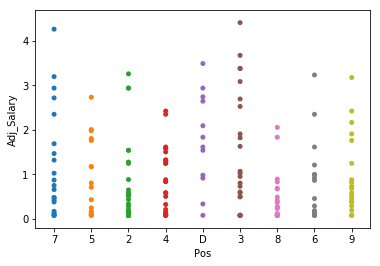

In [571]:
sns.stripplot(x="Pos", y="Adj_Salary", data=batters_only)

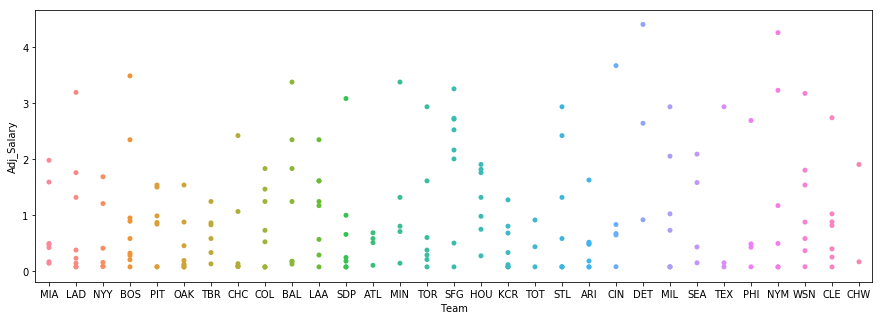

In [572]:
fig, ax = plt.subplots(figsize=(15,5))
sns.stripplot(x="Team", y="Adj_Salary", data=batters_only, ax=ax)

In [573]:
salary_df = batters_only.sort_values(by='Salary', ascending=False)
salary_df[:10]

,index,Games_Played,Plate_Appearances,At_Bats,Runs,Hits,Doubles,Triples,HR,RBI,...,Salary,Intercept,First_Base,Second_Base,Third_Base,Shortstop,Left_Field,Center_Field,Right_Field,DH
Player_Name,,,,,,,,,,,,,,,,,,,,,
Miguel Cabrera,599.0,148.000000,634.428571,550.428571,90.000000,176.571429,35.285714,0.571429,30.714286,104.857143,...,30000000.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Yoenis Cespedes,829.0,131.333333,549.833333,503.166667,75.333333,138.000000,27.666667,4.000000,25.666667,82.500000,...,29000000.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
Joey Votto,417.0,139.142857,610.142857,490.571429,85.000000,153.571429,33.000000,1.571429,23.857143,76.000000,...,25000000.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
J.D. Martinez,342.0,110.285714,445.428571,404.000000,55.857143,115.000000,24.000000,1.857143,21.714286,68.000000,...,23750000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Joe Mauer,411.0,127.857143,548.428571,478.857143,63.857143,139.285714,28.571429,1.857143,8.000000,57.571429,...,23000000.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Chris Davis,169.0,132.857143,547.000000,477.571429,76.000000,117.142857,22.428571,0.285714,32.571429,82.285714,...,23000000.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Buster Posey,134.0,132.000000,542.857143,478.428571,63.714286,148.142857,28.714286,0.857143,15.714286,75.285714,...,22177778.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Jose Reyes,468.0,120.428571,533.571429,486.857143,73.714286,139.428571,26.285714,6.428571,9.571429,46.285714,...,22000000.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Matt Kemp,573.0,130.714286,544.857143,495.142857,73.857143,141.285714,28.714286,1.857143,24.285714,84.142857,...,21750000.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [574]:
batters_only_df = batters_only[['Runs', 'Hits', 'Doubles', 'Triples', 'HR', 'RBI', 'BA', 'OBP', 'SLG',
                                'OPS', 'SB', 'TB', 'SF', 'Age', 'Total_games_played',
                                'dWAR','All_star_count','First_Base','Second_Base','Third_Base',
                                'Shortstop','Left_Field','Center_Field','Right_Field','DH','Team','Salary']]

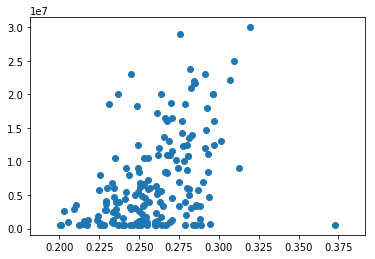

In [575]:
## Remove players below Mendoza line

batters_only_df = batters_only_df[batters_only_df['BA'] > 0.2]

plt.scatter(batters_only_df['BA'], batters_only_df['Salary'])

In [576]:
no_categorical = batters_only_df[['Runs', 'Hits', 'Doubles', 'Triples', 'HR', 'RBI',
                                  'BA', 'OBP', 'SLG', 'OPS', 'SB', 'TB', 'SF',
                                  'Age', 'Total_games_played', 'dWAR', 'All_star_count']]

In [577]:
from sklearn import preprocessing
normalized_categorical = preprocessing.normalize(no_categorical, axis=0)

In [578]:
normalized_categorical=pd.DataFrame(normalized_categorical,columns=no_categorical.columns)

In [579]:
no_categorical.reset_index(inplace=True)

In [580]:
normalized_categorical['Player_Name'] = no_categorical['Player_Name']
only_salary = batters_only_df['Salary']
only_salary = pd.DataFrame(only_salary)
only_salary

,Salary
Player_Name,
Cameron Maybin,3250000.0
Justin Turner,12000000.0
Dustin Pedroia,16000000.0
Corey Dickerson,5950000.0
Khris Davis,10500000.0
Jesus Sucre,925000.0
Ben Zobrist,16500000.0
DJ LeMahieu,8500000.0
Mark Trumbo,12500000.0


In [581]:
normalized_categorical

,Runs,Hits,Doubles,Triples,HR,RBI,BA,OBP,SLG,OPS,SB,TB,SF,Age,Total_games_played,dWAR,All_star_count,Player_Name
0,0.076495,0.070074,0.058241,0.107763,0.032338,0.051784,0.070459,0.071953,0.063280,0.067189,0.152867,0.061604,0.039367,0.077878,0.087073,0.009783,0.000000,Cameron Maybin
1,0.068292,0.076965,0.089479,0.029013,0.059412,0.074894,0.084108,0.082521,0.080703,0.081634,0.031628,0.074158,0.085892,0.083070,0.095405,0.025157,0.047727,Justin Turner
2,0.111359,0.120323,0.119129,0.041447,0.064676,0.100786,0.085673,0.083938,0.076997,0.080168,0.086449,0.105995,0.128839,0.085666,0.111130,0.148148,0.047727,Dustin Pedroia
3,0.079530,0.081035,0.094138,0.116052,0.094758,0.076692,0.081168,0.075355,0.090670,0.084104,0.020663,0.089054,0.050104,0.072686,0.066068,-0.068484,0.047727,Corey Dickerson
4,0.093886,0.079254,0.085243,0.040618,0.152666,0.112042,0.073014,0.074713,0.093943,0.085665,0.026567,0.099472,0.110229,0.075282,0.073226,-0.093920,0.000000,Khris Davis
5,0.010910,0.014100,0.011860,0.000000,0.009476,0.014679,0.074978,0.068906,0.063183,0.065798,0.002952,0.012502,0.025052,0.075282,0.017602,0.027393,0.000000,Jesus Sucre
6,0.117921,0.106436,0.128130,0.116052,0.078965,0.100572,0.076903,0.082546,0.077308,0.079734,0.068527,0.104636,0.125260,0.093454,0.119345,0.054507,0.095455,Ben Zobrist
7,0.084288,0.093184,0.069359,0.120197,0.025570,0.061413,0.084687,0.078185,0.069280,0.073301,0.072744,0.075711,0.071577,0.072686,0.097048,0.106219,0.095455,DJ LeMahieu
8,0.100079,0.098167,0.088420,0.045592,0.151162,0.124110,0.071903,0.069650,0.082642,0.077081,0.024248,0.111172,0.060840,0.080474,0.115824,-0.099231,0.095455,Mark Trumbo
9,0.146017,0.122762,0.124953,0.120197,0.106791,0.111485,0.077685,0.077052,0.078569,0.078034,0.125457,0.121525,0.096629,0.090858,0.123804,0.173305,0.095455,Ian Kinsler


In [582]:
## NO ARIZONA FOR NOW

categorical_data = batters_only_df[['First_Base','Second_Base','Third_Base','Shortstop',
                                    'Left_Field', 'Right_Field','Center_Field','DH','Team']]

categorical_data

,First_Base,Second_Base,Third_Base,Shortstop,Left_Field,Right_Field,Center_Field,DH,Team
Player_Name,,,,,,,,,
Cameron Maybin,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,MIA
Justin Turner,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,LAD
Dustin Pedroia,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,BOS
Corey Dickerson,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,PIT
Khris Davis,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,OAK
Jesus Sucre,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TBR
Ben Zobrist,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,CHC
DJ LeMahieu,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,COL
Mark Trumbo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,BAL


In [583]:
categorical_data.reset_index(inplace=True)

categorical_data

,Player_Name,First_Base,Second_Base,Third_Base,Shortstop,Left_Field,Right_Field,Center_Field,DH,Team
0,Cameron Maybin,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,MIA
1,Justin Turner,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,LAD
2,Dustin Pedroia,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,BOS
3,Corey Dickerson,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,PIT
4,Khris Davis,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,OAK
5,Jesus Sucre,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TBR
6,Ben Zobrist,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,CHC
7,DJ LeMahieu,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,COL
8,Mark Trumbo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,BAL
9,Ian Kinsler,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,LAA


In [584]:
only_salary.reset_index(inplace=True)

only_salary

,Player_Name,Salary
0,Cameron Maybin,3250000.0
1,Justin Turner,12000000.0
2,Dustin Pedroia,16000000.0
3,Corey Dickerson,5950000.0
4,Khris Davis,10500000.0
5,Jesus Sucre,925000.0
6,Ben Zobrist,16500000.0
7,DJ LeMahieu,8500000.0
8,Mark Trumbo,12500000.0
9,Ian Kinsler,11000000.0


In [585]:
norm_batters = pd.merge(normalized_categorical, categorical_data)

norm_batters = pd.merge(norm_batters, only_salary)

In [586]:
norm_batters = norm_batters.set_index('Player_Name')

In [587]:
norm_batters.columns

Index(['Runs', 'Hits', 'Doubles', 'Triples', 'HR', 'RBI', 'BA', 'OBP', 'SLG',
       'OPS', 'SB', 'TB', 'SF', 'Age', 'Total_games_played', 'dWAR',
       'All_star_count', 'First_Base', 'Second_Base', 'Third_Base',
       'Shortstop', 'Left_Field', 'Right_Field', 'Center_Field', 'DH', 'Team',
       'Salary'],
      dtype='object')

In [588]:
salary_df = norm_batters.sort_values(by='Salary', ascending=False)
salary_df[:10]['Salary']

Player_Name
Miguel Cabrera     30000000.0
Yoenis Cespedes    29000000.0
Joey Votto         25000000.0
J.D. Martinez      23750000.0
Chris Davis        23000000.0
Joe Mauer          23000000.0
Buster Posey       22177778.0
Jose Reyes         22000000.0
Matt Kemp          21750000.0
Bryce Harper       21625000.0
Name: Salary, dtype: float64

In [589]:
training_df = norm_batters.copy(deep=True)

In [590]:
training_df['Salary']

Player_Name
Cameron Maybin        3250000.0
Justin Turner        12000000.0
Dustin Pedroia       16000000.0
Corey Dickerson       5950000.0
Khris Davis          10500000.0
Jesus Sucre            925000.0
Ben Zobrist          16500000.0
DJ LeMahieu           8500000.0
Mark Trumbo          12500000.0
Ian Kinsler          11000000.0
Cory Spangenberg      1700000.0
Tyler Flowers         4000000.0
Eduardo Escobar       4850000.0
Justin Smoak          4125000.0
Joe Panik             3450000.0
Marwin Gonzalez       5125000.0
Ender Inciarte        4700000.0
Mike Moustakas        5500000.0
Chris Taylor           575000.0
Brian Dozier          9000000.0
Tyler Saladino         565000.0
A.J. Ellis            1250000.0
Evan Gattis           6700000.0
Josh Bell              572500.0
Justin Upton         16000000.0
Yadier Molina        20000000.0
Dexter Fowler        16500000.0
Steven Souza Jr.      3550000.0
Matt Kemp            21750000.0
Chris Iannetta        3600000.0
                        ... 

In [591]:
training_df.describe()

,Runs,Hits,Doubles,Triples,HR,RBI,BA,OBP,SLG,OPS,...,All_star_count,First_Base,Second_Base,Third_Base,Shortstop,Left_Field,Right_Field,Center_Field,DH,Salary
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,...,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,1.770000e+02
mean,0.068554,0.069289,0.068961,0.059147,0.062674,0.067331,0.074798,0.074821,0.074526,0.074779,...,0.038020,0.129944,0.141243,0.090395,0.107345,0.112994,0.107345,0.101695,0.067797,7.055366e+06
std,0.030910,0.029215,0.029986,0.046514,0.041611,0.033505,0.007438,0.007197,0.009807,0.007625,...,0.065024,0.337195,0.349260,0.287561,0.310429,0.317484,0.310429,0.303104,0.252110,6.875865e+06
min,0.010049,0.012244,0.011860,0.000000,0.004387,0.008388,0.057788,0.053896,0.051334,0.053515,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.500000e+05
25%,0.046799,0.046900,0.046063,0.020724,0.031586,0.039544,0.069704,0.070378,0.068388,0.069572,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.250000e+06
50%,0.066241,0.069570,0.067771,0.049737,0.056404,0.063660,0.074973,0.074279,0.074554,0.074848,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.700000e+06
75%,0.090440,0.093184,0.088949,0.092842,0.085734,0.086235,0.080416,0.079317,0.080568,0.079486,...,0.047727,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.085714e+07
max,0.146017,0.134688,0.133424,0.236249,0.186508,0.157064,0.107728,0.101555,0.098893,0.097398,...,0.286364,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000e+07


In [592]:
training_df.columns

Index(['Runs', 'Hits', 'Doubles', 'Triples', 'HR', 'RBI', 'BA', 'OBP', 'SLG',
       'OPS', 'SB', 'TB', 'SF', 'Age', 'Total_games_played', 'dWAR',
       'All_star_count', 'First_Base', 'Second_Base', 'Third_Base',
       'Shortstop', 'Left_Field', 'Right_Field', 'Center_Field', 'DH', 'Team',
       'Salary'],
      dtype='object')

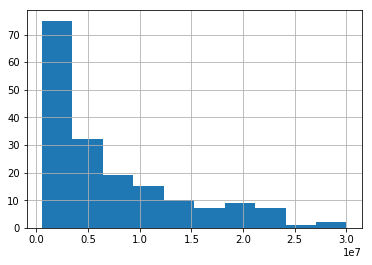

In [593]:
training_df.Salary.hist()

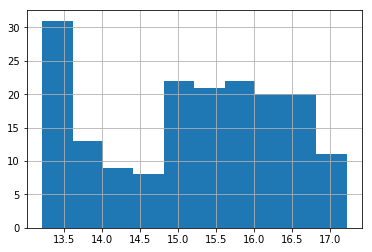

In [594]:
training_df['log_salary'] = np.log(training_df.Salary)

training_df.log_salary.hist()

In [595]:
from scipy import stats

y_transformed, _ = stats.boxcox(training_df.Salary)

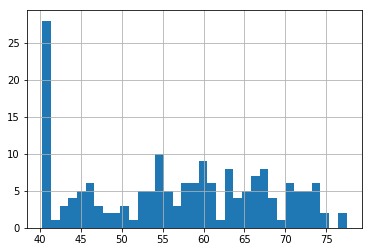

In [596]:
pd.Series(y_transformed).hist(bins=35)

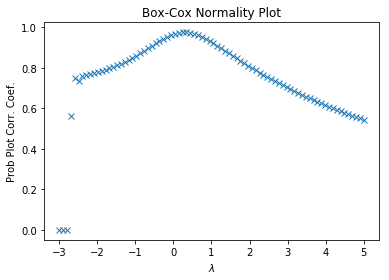

In [597]:
fig = plt.figure()
ax = fig.add_subplot(111)
prob = stats.boxcox_normplot(training_df.Salary, -3, 5, plot=ax)

0.27522614877732177


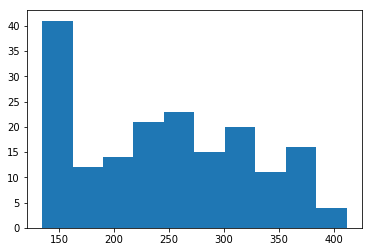

In [598]:
lamb=stats.boxcox_normmax(training_df.Salary, brack=(-1.9, 1.9))
print(lamb)
training_df['y_t'] =(np.power(training_df.Salary,0.27522613935555035)-1)/0.27522613935555035

plt.hist(training_df['y_t']);

In [599]:
from scipy.special import inv_boxcox

training_df['real_salary'] = inv_boxcox(training_df['y_t'], 0.279286511856211)

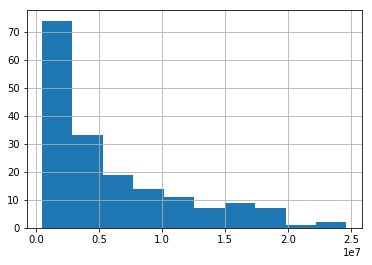

In [600]:
training_df.real_salary.hist()

In [601]:
training_df.loc[:,'rootASC'] = training_df.loc[:,'All_star_count'] ** 0.5

In [602]:
training_df.corr()

,Runs,Hits,Doubles,Triples,HR,RBI,BA,OBP,SLG,OPS,...,Shortstop,Left_Field,Right_Field,Center_Field,DH,Salary,log_salary,y_t,real_salary,rootASC
Runs,1.000000,0.943415,0.915930,0.487417,0.765964,0.869696,0.523820,0.550782,0.654609,0.702056,...,-0.119911,0.111255,0.133024,-0.028210,0.124536,0.708086,0.731238,0.745856,0.709570,0.646221
Hits,0.943415,1.000000,0.955417,0.448931,0.700691,0.878105,0.622917,0.522499,0.625562,0.669313,...,-0.094949,0.073249,0.056175,-0.083609,0.128320,0.731811,0.779445,0.788004,0.733629,0.670140
Doubles,0.915930,0.955417,1.000000,0.355041,0.739168,0.894051,0.575723,0.517225,0.684211,0.709603,...,-0.126257,0.065683,0.063001,-0.123914,0.110013,0.706239,0.748010,0.756791,0.707909,0.636709
Triples,0.487417,0.448931,0.355041,1.000000,0.038524,0.161945,0.335696,0.198360,0.134127,0.179242,...,0.082136,0.171308,0.182764,0.194703,-0.148730,0.175715,0.239878,0.229781,0.176926,0.162395
HR,0.765964,0.700691,0.739168,0.038524,1.000000,0.928039,0.279074,0.371153,0.824807,0.750961,...,-0.166831,0.077842,0.089029,-0.179484,0.319053,0.624245,0.616966,0.636094,0.625112,0.551645
RBI,0.869696,0.878105,0.894051,0.161945,0.928039,1.000000,0.467889,0.480710,0.790880,0.771739,...,-0.171720,0.073594,0.056517,-0.190441,0.262698,0.733416,0.728593,0.750691,0.734532,0.639801
BA,0.523820,0.622917,0.575723,0.335696,0.279074,0.467889,1.000000,0.694937,0.594514,0.718204,...,-0.108349,0.041860,0.008953,-0.082475,0.041769,0.453145,0.399672,0.429076,0.453314,0.468253
OBP,0.550782,0.522499,0.517225,0.198360,0.371153,0.480710,0.694937,1.000000,0.507374,0.781371,...,-0.191482,0.059343,0.096032,-0.135409,0.095225,0.498808,0.398235,0.441274,0.498438,0.443713
SLG,0.654609,0.625562,0.684211,0.134127,0.824807,0.790880,0.594514,0.507374,1.000000,0.934222,...,-0.203217,0.055501,0.165960,-0.147615,0.222184,0.528238,0.490082,0.515084,0.528556,0.486834
OPS,0.702056,0.669313,0.709603,0.179242,0.750961,0.771739,0.718204,0.781371,0.934222,1.000000,...,-0.226431,0.064758,0.159939,-0.162953,0.200323,0.589024,0.519761,0.555683,0.589100,0.536233


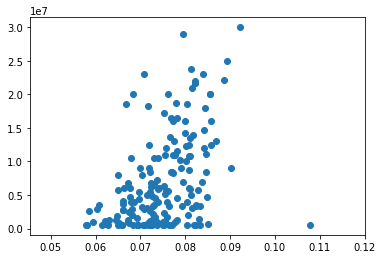

In [603]:
plt.scatter(training_df['BA'], training_df['Salary'])

In [604]:
#sns.pairplot(batters_only_df, size=1.2, aspect=1.5)

In [605]:
X2=patsy.dmatrix('Team',data=training_df,return_type='dataframe')
X2.head()

,Intercept,Team[T.ATL],Team[T.BAL],Team[T.BOS],Team[T.CHC],Team[T.CHW],Team[T.CIN],Team[T.CLE],Team[T.COL],Team[T.DET],...,Team[T.PIT],Team[T.SDP],Team[T.SEA],Team[T.SFG],Team[T.STL],Team[T.TBR],Team[T.TEX],Team[T.TOR],Team[T.TOT],Team[T.WSN]
Player_Name,,,,,,,,,,,,,,,,,,,,,
Cameron Maybin,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Justin Turner,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Dustin Pedroia,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Corey Dickerson,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Khris Davis,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [606]:
training_df=training_df.join(X2)

In [607]:
training_df['LAA'] = training_df['Team[T.LAA]']
training_df['LAD'] = training_df['Team[T.LAD]']
training_df['PIT'] = training_df['Team[T.PIT]']
training_df['SDP'] = training_df['Team[T.SDP]']
training_df['STL'] = training_df['Team[T.STL]']
training_df['TBR'] = training_df['Team[T.TBR]']
training_df['TOR'] = training_df['Team[T.TOR]']
training_df['WSN'] = training_df['Team[T.WSN]']
training_df['SFG'] = training_df['Team[T.SFG]']
training_df['NYM'] = training_df['Team[T.NYM]']
training_df['MIA'] = training_df['Team[T.MIA]']


training_df = training_df.drop(['Team[T.LAA]','Team[T.LAD]','Team[T.PIT]',
                                        'Team[T.SDP]','Team[T.STL]','Team[T.TBR]',
                                        'Team[T.TOR]','Team[T.WSN]','Team[T.SFG]','Team[T.NYM]','Team[T.MIA]'],1)

In [608]:
training_df['ATL'] = training_df['Team[T.ATL]']
training_df['BAL'] = training_df['Team[T.BAL]']
training_df['BOS'] = training_df['Team[T.BOS]']
training_df['CHC'] = training_df['Team[T.CHC]']
training_df['CHW'] = training_df['Team[T.CHW]']
training_df['CIN'] = training_df['Team[T.CIN]']
training_df['CLE'] = training_df['Team[T.CLE]']
training_df['COL'] = training_df['Team[T.COL]']
training_df['HOU'] = training_df['Team[T.HOU]']
training_df['KCR'] = training_df['Team[T.KCR]']
training_df['MIL'] = training_df['Team[T.MIL]']
training_df['MIN'] = training_df['Team[T.MIN]']
training_df['NYY'] = training_df['Team[T.NYY]']
training_df['OAK'] = training_df['Team[T.OAK]']
training_df['PHI'] = training_df['Team[T.PHI]']
training_df['SEA'] = training_df['Team[T.SEA]']
training_df['TEX'] = training_df['Team[T.TEX]']
training_df['TOT'] = training_df['Team[T.TOT]']


training_df = training_df.drop(['Team[T.ATL]','Team[T.BAL]','Team[T.BOS]',
                                        'Team[T.CHC]','Team[T.CHW]','Team[T.CIN]',
                                        'Team[T.CLE]','Team[T.COL]','Team[T.HOU]',
                                        'Team[T.KCR]','Team[T.MIL]','Team[T.MIN]',
                                        'Team[T.NYY]','Team[T.OAK]','Team[T.PHI]',
                                        'Team[T.SEA]','Team[T.TEX]','Team[T.TOT]',
                                        'Team', 'Intercept'],1)

In [609]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 177 entries, Cameron Maybin to Jurickson Profar
Data columns (total 60 columns):
Runs                  177 non-null float64
Hits                  177 non-null float64
Doubles               177 non-null float64
Triples               177 non-null float64
HR                    177 non-null float64
RBI                   177 non-null float64
BA                    177 non-null float64
OBP                   177 non-null float64
SLG                   177 non-null float64
OPS                   177 non-null float64
SB                    177 non-null float64
TB                    177 non-null float64
SF                    177 non-null float64
Age                   177 non-null float64
Total_games_played    177 non-null float64
dWAR                  177 non-null float64
All_star_count        177 non-null float64
First_Base            177 non-null float64
Second_Base           177 non-null float64
Third_Base            177 non-null float64
Shortstop     

In [610]:
#sns.pairplot(training_df, size=1.2, aspect=1.5)

In [611]:
y, X = patsy.dmatrices('y_t ~ Runs + Hits + Doubles + Triples + HR + RBI + BA + OBP +'
                       'SLG + OPS + SB + TB + SF + Age + Total_games_played + All_star_count + dWAR +'
                       'First_Base + Second_Base + Third_Base + Shortstop + Left_Field +'
                       'Center_Field + Right_Field + Center_Field + DH + LAA + LAD + PIT + SDP + STL +'
                       'TBR + TOR + WSN + SFG + NYM + MIA + ATL + BAL + BOS + CHC + CHW + CIN +'
                       'CLE + COL + HOU + KCR + MIL + MIN + NYY + OAK + PHI + SEA + TEX + TOT',
                       data=training_df, return_type="dataframe")

model2 = sm.OLS(y, X)
fit2 = model2.fit()
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    y_t   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     10.86
Date:                Wed, 18 Jul 2018   Prob (F-statistic):           2.25e-27
Time:                        22:17:20   Log-Likelihood:                -873.21
No. Observations:                 177   AIC:                             1852.
Df Residuals:                     124   BIC:                             2021.
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             48.3446     64.576      0.749      0.455     -79.469     176.158
Runs                 999.1115    703.001      1.421      0.158    -392.325    2390.548
Hits                1236.6773    583.180      2.121      0.036      82.402    2390.953
Doubles             -810.1551    502.953     -1.611      0.110   -1805.640     185.330
Triples             -133.0751    131.841     -1.009      0.315    -394.025     127.875
HR                  -372.4454    490.279     -0.760      0.449   -1342.845     597.954
RBI                 -911.9560    682.884     -1.335      0.184   -2263.575     439.663
BA                  -636.3993   1256.803     -0.506      0.614   -3123.965    1851.166
OBP                 -483.5715    777.254     -0.622      0.535   -2021.975    1054.832
SLG                 1556.4879    971.843      1.602      0.112    -367.062    3480.037
OPS                  664.3944    551.661      1.204      0.231    -427.497    1756.285
SB                  -291.3217     98.065     -2.971      0.004    -485.419     -97.224
TB                   555.5595    360.484      1.541      0.126    -157.940    1269.059
SF                    98.1117    191.986      0.511      0.610    -281.883     478.107
Age                   67.4022    592.163      0.114      0.910   -1104.654    1239.458
Total_games_played  1412.8687    242.236      5.833      0.000     933.416    1892.321
All_star_count        36.2874     76.824      0.472      0.638    -115.768     188.343
dWAR                  27.2394     65.831      0.414      0.680    -103.058     157.537
First_Base           -13.3405     16.991     -0.785      0.434     -46.971      20.290
Second_Base          -36.2692     15.167     -2.391      0.018     -66.288      -6.250
Third_Base           -17.9601     15.540     -1.156      0.250     -48.718      12.797
Shortstop            -12.2188     14.882     -0.821      0.413     -41.675      17.238
Left_Field           -13.0709     16.478     -0.793      0.429     -45.686      19.544
Center_Field         -19.1919     16.192     -1.185      0.238     -51.241      12.857
Right_Field          -24.3150     17.867     -1.361      0.176     -59.679      11.049
DH                     8.2305     20.256      0.406      0.685     -31.862      48.323
LAA                  -20.6528     21.803     -0.947      0.345     -63.807      22.501
LAD                   -7.7517     21.695     -0.357      0.721     -50.693      35.189
PIT                    6.8255     22.404      0.305      0.761     -37.519      51.170
SDP                   -7.6826     22.246     -0.345      0.730     -51.714      36.348
STL                   -9.6894     21.276     -0.455      0.650     -51.801      32.422
TBR                  -10.9579     22.850     -0.480      0.632     -56.184      34.268
TOR                   -8.8952     22.5

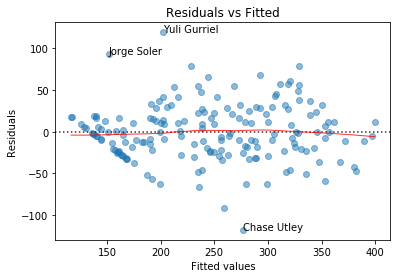

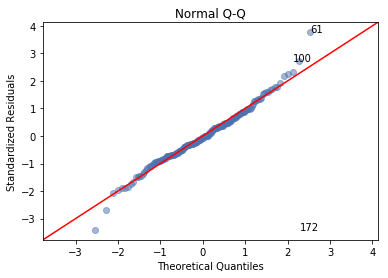

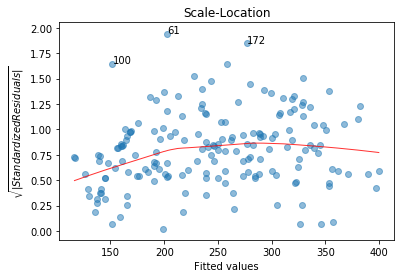

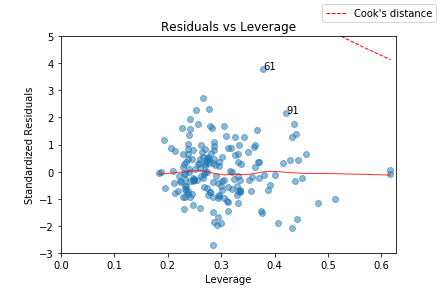

In [612]:
diagnostic_plots.diagnostic_plots(training_df.drop(
    'y_t', axis=1), training_df['y_t'], fit2)

In [613]:
X_exp2 = inv_boxcox(X, 0.279286511856211)
y_exp2 = inv_boxcox(y, 0.279286511856211)

In [614]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_exp2, y_exp2, test_size=0.3, random_state=55)

reg2 = LinearRegression()
scores = cross_val_score(reg2, X_exp2, y_exp2, cv=10, scoring='r2')
mse_scores = cross_val_score(reg2, X_exp2, y_exp2, cv=10, scoring='neg_mean_squared_error')

# Read in the pickle file
print(np.mean(scores))
print(-np.mean(mse_scores))

0.39154328812698713
17159190666408.656


   test_score  train_score  train_size
0   -0.254540     1.000000          13
1   -2.828792     1.000000          42
2    0.118251     0.904368          72
3    0.170857     0.853700         102
4    0.333260     0.800577         132


(-1, 1)

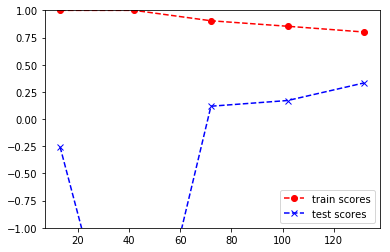

In [615]:
train_sizes, train_scores, test_scores = learning_curve(reg2, X_exp2, y_exp2, cv=4)
ave_train_scores = train_scores.mean(axis=1)
ave_test_scores = test_scores.mean(axis=1)

learn_df = pd.DataFrame({
    'train_size': train_sizes,
    'train_score': ave_train_scores,
    'test_score': ave_test_scores
})
print(learn_df)

plt.plot(learn_df['train_size'], learn_df['train_score'], 'r--o', label='train scores')
plt.plot(learn_df['train_size'], learn_df['test_score'], 'b--x', label='test scores')
plt.legend(loc='lower right')
plt.ylim(-1,1)

In [616]:
y, X = patsy.dmatrices('y_t ~ Runs + Hits + Doubles + Triples + HR + RBI + BA + OBP +'
                       'SLG + OPS + SB + TB + Age + Total_games_played + rootASC + dWAR +'
                       'First_Base + Second_Base + Third_Base + Shortstop + Left_Field +'
                       'Center_Field + Right_Field + Center_Field + DH',
                       data=training_df, return_type="dataframe")

model3 = sm.OLS(y, X)
fit3 = model3.fit()
fit3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    y_t   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     24.79
Date:                Wed, 18 Jul 2018   Prob (F-statistic):           8.64e-40
Time:                        22:17:21   Log-Likelihood:                -891.03
No. Observations:                 177   AIC:                             1828.
Df Residuals:                     154   BIC:                             1901.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             56.0768     59.255      0.946      0.345     -60.981     173.134
Runs                 408.0796    569.478      0.717      0.475    -716.918    1533.077
Hits                1117.1368    530.859      2.104      0.037      68.432    2165.842
Doubles             -451.9532    446.653     -1.012      0.313   -1334.311     430.404
Triples              -32.1615    113.027     -0.285      0.776    -255.444     191.121
HR                   -83.3873    401.898     -0.207      0.836    -877.333     710.558
RBI                 -759.4667    578.577     -1.313      0.191   -1902.439     383.506
BA                  -142.1209   1149.674     -0.124      0.902   -2413.288    2129.046
OBP                  -43.8949    663.797     -0.066      0.947   -1355.217    1267.427
SLG                  620.8036    836.826      0.742      0.459   -1032.335    2273.942
OPS                  330.3276    475.327      0.695      0.488    -608.675    1269.330
SB                  -226.7881     88.552     -2.561      0.011    -401.721     -51.856
TB                   604.1375    309.492      1.952      0.053      -7.260    1215.535
Age                   58.3411    538.847      0.108      0.914   -1006.146    1122.828
Total_games_played  1283.9581    217.068      5.915      0.000     855.142    1712.774
rootASC               50.1344     29.715      1.687      0.094      -8.568     108.837
dWAR                   0.5686     58.148      0.010      0.992    -114.301     115.438
First_Base            -3.6886     15.291     -0.241      0.810     -33.895      26.518
Second_Base          -30.7520     13.789     -2.230      0.027     -57.992      -3.512
Third_Base           -14.0292     14.372     -0.976      0.331     -42.422      14.363
Shortstop            -10.3879     13.903     -0.747      0.456     -37.854      17.078
Left_Field            -5.4210     14.819     -0.366      0.715     -34.696      23.854
Center_Field         -15.2433     15.228     -1.001      0.318     -45.326      14.839
Right_Field          -16.3142     15.731     -1.037      0.301     -47.390      14.761
DH                     9.4590     18.293      0.517      0.606     -26.678      45.596
==============================================================================
Omnibus:                        5.175   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.075   Jarque-Bera (JB):                6.295
Skew:                           0.180   Prob(JB):                       0.0430
Kurtosis:                       3.851   Cond. No.                     9.97e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.1e-32. This might indicate that there

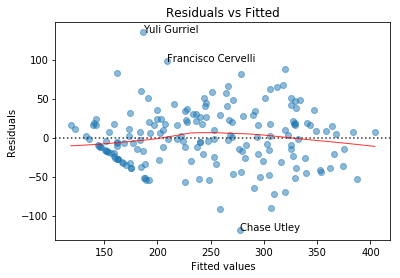

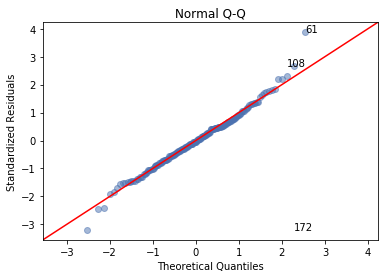

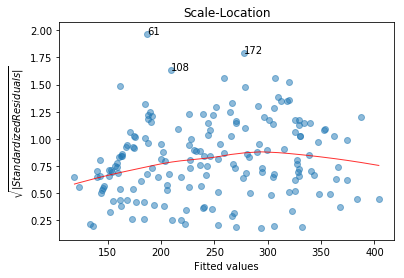

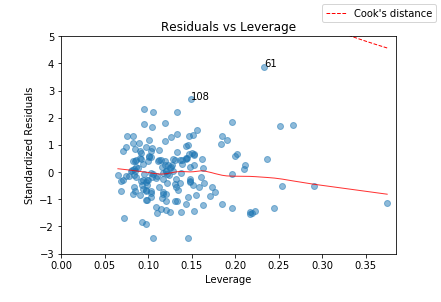

In [617]:
diagnostic_plots.diagnostic_plots(training_df.drop(
    'y_t', axis=1), training_df['y_t'], fit3)

In [618]:
X_exp3 = inv_boxcox(X, 0.279286511856211)
y_exp3 = inv_boxcox(y, 0.279286511856211)

In [619]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_exp3, y_exp3, test_size=0.3, random_state=55)

reg3 = LinearRegression()
scores = cross_val_score(reg3, X_exp3, y_exp3, cv=10, scoring='r2')
mse_scores = cross_val_score(reg3, X_exp3, y_exp3, cv=10, scoring='neg_mean_squared_error')

# Read in the pickle file
print(np.mean(scores))
print(-np.mean(mse_scores))

0.5127842766175975
13758264364608.24


   test_score  train_score  train_size
0   -1.306845     1.000000          13
1    0.209361     0.944190          42
2    0.341555     0.797333          72
3    0.439516     0.768120         102
4    0.553733     0.732999         132


(-1, 1)

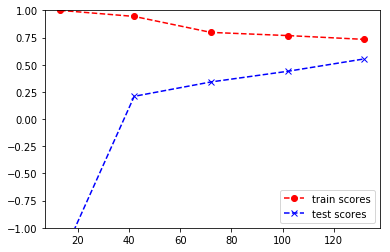

In [620]:
train_sizes, train_scores, test_scores = learning_curve(reg3, X_exp3, y_exp3, cv=4)
ave_train_scores = train_scores.mean(axis=1)
ave_test_scores = test_scores.mean(axis=1)

learn_df = pd.DataFrame({
    'train_size': train_sizes,
    'train_score': ave_train_scores,
    'test_score': ave_test_scores
})
print(learn_df)

plt.plot(learn_df['train_size'], learn_df['train_score'], 'r--o', label='train scores')
plt.plot(learn_df['train_size'], learn_df['test_score'], 'b--x', label='test scores')
plt.legend(loc='lower right')
plt.ylim(-1,1)

In [621]:
y, X = patsy.dmatrices('y_t ~ Hits + Doubles + HR + RBI + BA + OBP +'
                       'OPS + SB + TB + Age + Total_games_played + rootASC + dWAR +'
                       'First_Base + Second_Base + Third_Base + Shortstop + Left_Field +'
                       'Center_Field + Right_Field + Center_Field + DH',
                       data=training_df, return_type="dataframe")

model4 = sm.OLS(y, X)
fit4 = model4.fit()
fit4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    y_t   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     26.03
Date:                Wed, 18 Jul 2018   Prob (F-statistic):           2.14e-40
Time:                        22:17:23   Log-Likelihood:                -891.33
No. Observations:                 177   AIC:                             1827.
Df Residuals:                     155   BIC:                             1897.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             51.3549     58.795      0.873      0.384     -64.788     167.498
Hits                1522.7718   2410.906      0.632      0.529   -3239.701    6285.244
Doubles             -354.9714    539.851     -0.658      0.512   -1421.386     711.444
HR                   140.7385    911.317      0.154      0.877   -1659.465    1940.942
RBI                 -827.6418    569.805     -1.452      0.148   -1953.228     297.944
BA                  -266.6903   1134.670     -0.235      0.814   -2508.103    1974.723
OBP                 -147.2903    914.550     -0.161      0.872   -1953.880    1659.299
OPS                 1189.6876   1858.488      0.640      0.523   -2481.547    4860.922
SB                  -197.0874     78.130     -2.523      0.013    -351.424     -42.751
TB                   323.7704   3409.991      0.095      0.924   -6412.282    7059.823
Age                   88.4174    536.367      0.165      0.869    -971.114    1147.949
Total_games_played  1279.7431    216.648      5.907      0.000     851.780    1707.706
rootASC               49.9400     29.667      1.683      0.094      -8.665     108.544
dWAR                   1.3504     58.046      0.023      0.981    -113.313     116.014
First_Base            -2.5274     15.181     -0.166      0.868     -32.515      27.461
Second_Base          -28.2451     13.317     -2.121      0.036     -54.551      -1.939
Third_Base           -13.1813     14.301     -0.922      0.358     -41.432      15.069
Shortstop             -9.0740     13.760     -0.659      0.511     -36.256      18.108
Left_Field            -3.6579     14.591     -0.251      0.802     -32.480      25.164
Center_Field         -12.7616     14.806     -0.862      0.390     -42.008      16.485
Right_Field          -13.4558     15.193     -0.886      0.377     -43.467      16.555
DH                     9.3652     18.263      0.513      0.609     -26.712      45.443
==============================================================================
Omnibus:                        4.462   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.107   Jarque-Bera (JB):                5.146
Skew:                           0.160   Prob(JB):                       0.0763
Kurtosis:                       3.772   Cond. No.                     1.55e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.55e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

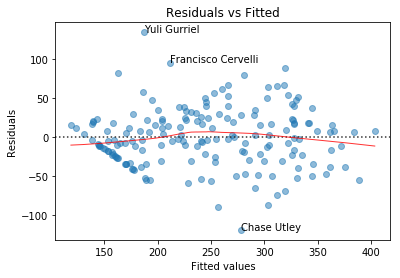

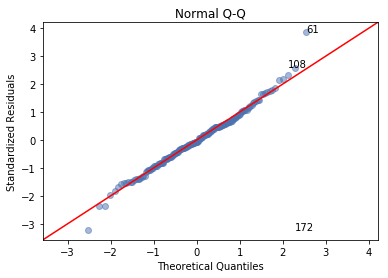

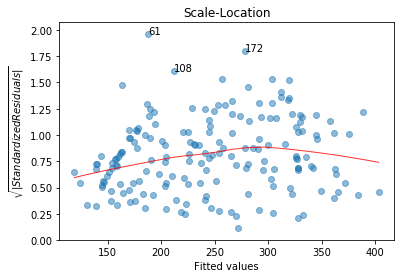

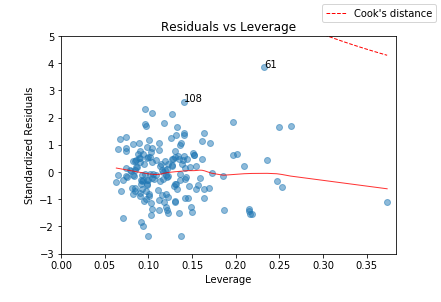

In [622]:
diagnostic_plots.diagnostic_plots(training_df.drop(
    'y_t', axis=1), training_df['y_t'], fit4)

In [623]:
X_exp4 = inv_boxcox(X, 0.279286511856211)
y_exp4 = inv_boxcox(y, 0.279286511856211)

In [624]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(X_exp4, y_exp4, test_size=0.3, random_state=55)

reg4 = LinearRegression()
scores = cross_val_score(reg4, X_exp4, y_exp4, cv=10, scoring='r2')
mse_scores = cross_val_score(reg4, X_exp4, y_exp4, cv=10, scoring='neg_mean_squared_error')

# Read in the pickle file
print(np.mean(scores))
print(-np.mean(mse_scores))

0.5315263636387484
13123516549507.346


   test_score  train_score  train_size
0   -6.287864     1.000000          13
1    0.195784     0.935359          42
2    0.397775     0.787646          72
3    0.486981     0.755546         102
4    0.562810     0.723783         132


(-1, 1)

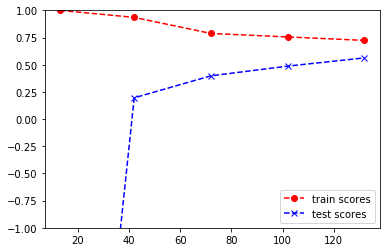

In [625]:
train_sizes, train_scores, test_scores = learning_curve(reg4, X_exp4, y_exp4, cv=4)
ave_train_scores = train_scores.mean(axis=1)
ave_test_scores = test_scores.mean(axis=1)

learn_df = pd.DataFrame({
    'train_size': train_sizes,
    'train_score': ave_train_scores,
    'test_score': ave_test_scores
})
print(learn_df)

plt.plot(learn_df['train_size'], learn_df['train_score'], 'r--o', label='train scores')
plt.plot(learn_df['train_size'], learn_df['test_score'], 'b--x', label='test scores')
plt.legend(loc='lower right')
plt.ylim(-1,1)

In [626]:
y, X = patsy.dmatrices('y_t ~ Hits + OBP +'
                       'Age + Total_games_played + rootASC +'
                       'First_Base + Second_Base + Third_Base + Shortstop + Left_Field +'
                       'Center_Field + Right_Field + Center_Field',
                       data=training_df, return_type="dataframe")

model5 = sm.OLS(y, X)
fit5 = model5.fit()
fit5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    y_t   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     44.79
Date:                Wed, 18 Jul 2018   Prob (F-statistic):           1.74e-45
Time:                        22:17:24   Log-Likelihood:                -896.33
No. Observations:                 177   AIC:                             1819.
Df Residuals:                     164   BIC:                             1860.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             88.7005     47.605      1.863      0.064      -5.298     182.699
Hits                 854.8129    203.384      4.203      0.000     453.224    1256.402
OBP                  292.4180    531.205      0.550      0.583    -756.466    1341.302
Age                   24.7980    513.675      0.048      0.962    -989.471    1039.067
Total_games_played  1229.0272    200.829      6.120      0.000     832.483    1625.571
rootASC               46.7216     27.347      1.708      0.089      -7.276     100.719
First_Base            -4.5300     11.125     -0.407      0.684     -26.497      17.437
Second_Base          -35.6079     10.660     -3.340      0.001     -56.656     -14.560
Third_Base           -16.4257     12.348     -1.330      0.185     -40.807       7.956
Shortstop            -13.4518     11.950     -1.126      0.262     -37.048      10.144
Left_Field           -10.9744     11.419     -0.961      0.338     -33.522      11.573
Center_Field         -24.9138     11.877     -2.098      0.037     -48.365      -1.462
Right_Field          -17.0628     11.811     -1.445      0.150     -40.384       6.258
==============================================================================
Omnibus:                        2.209   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.331   Jarque-Bera (JB):                2.062
Skew:                           0.033   Prob(JB):                        0.357
Kurtosis:                       3.525   Cond. No.                         206.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

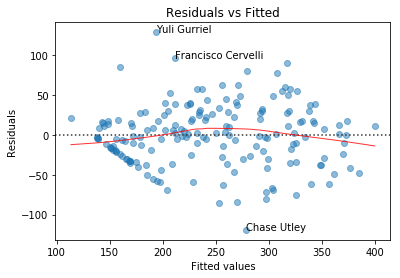

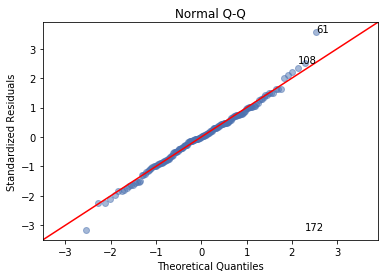

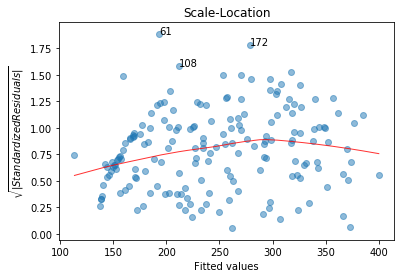

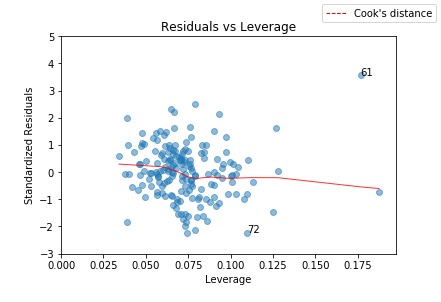

In [627]:
diagnostic_plots.diagnostic_plots(training_df.drop(
    'y_t', axis=1), training_df['y_t'], fit5)

In [628]:
y_exp5 = inv_boxcox(y, 0.279286511856211)

In [629]:
X_train5, X_test5, y_train5, y_test5 = train_test_split(X, y_exp5, test_size=0.3, random_state=55)

reg5 = LinearRegression()
scores = cross_val_score(reg5, X, y, cv=10, scoring='r2')
mse_scores = cross_val_score(reg5, X, y, cv=10, scoring='neg_mean_squared_error')

# Read in the pickle file
print(np.mean(scores))
print(-np.mean(mse_scores))

0.6973187934429008
1744.3363579483816


In [630]:
X_train5, X_test5, y_train5, y_test5 = train_test_split(X, y_exp5, test_size=0.3, random_state=55)

reg5 = LinearRegression()
scores = cross_val_score(reg5, X, y_exp5, cv=10, scoring='r2')
mse_scores = cross_val_score(reg5, X, y_exp5, cv=10, scoring='neg_mean_squared_error')
mean_mse_score = -np.mean(mse_scores)

print(np.mean(scores))
print(-np.mean(mse_scores))
print(mean_mse_score**0.5)

0.5741103744052107
11759562459426.969
3429221.8445920013


   test_score  train_score  train_size
0   -1.088094     0.938799          13
1    0.520321     0.828665          42
2    0.572600     0.743473          72
3    0.587958     0.732804         102
4    0.609234     0.703228         132


(-1, 1)

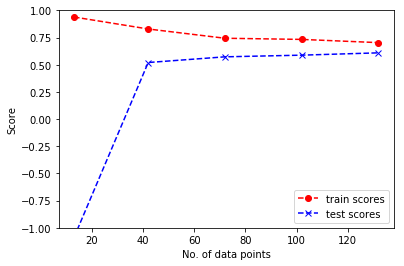

In [631]:
train_sizes, train_scores, test_scores = learning_curve(reg5, X, y_exp5, cv=4)
ave_train_scores = train_scores.mean(axis=1)
ave_test_scores = test_scores.mean(axis=1)

learn_df = pd.DataFrame({
    'train_size': train_sizes,
    'train_score': ave_train_scores,
    'test_score': ave_test_scores
})
print(learn_df)

plt.plot(learn_df['train_size'], learn_df['train_score'], 'r--o', label='train scores')
plt.plot(learn_df['train_size'], learn_df['test_score'], 'b--x', label='test scores')
plt.xlabel('No. of data points')
plt.ylabel('Score')
plt.legend(loc='lower right')
plt.ylim(-1,1)

0.27522614877732177


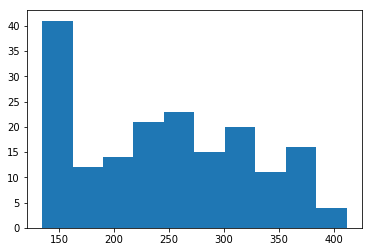

In [632]:
lamb=stats.boxcox_normmax(training_df.Salary, brack=(-1.9, 1.9))
print(lamb)
y_t =(np.power(training_df.Salary,lamb)-1)/lamb

plt.hist(training_df['y_t']);

In [633]:
X, y_t = training_df[['Runs','Hits','Doubles','Triples','HR','RBI','BA','OBP','SLG','OPS','SB','TB','SF',
                      'Age','Total_games_played','All_star_count','dWAR','First_Base','Second_Base','Third_Base',
                      'Shortstop','Left_Field','Center_Field','Right_Field','Center_Field','DH']], y_t

baseball_log = LinearRegression()
baseball_log_fit = baseball_log.fit(X,y_t)

In [634]:
y_log = np.log(training_df['Salary'])
X, y_log = training_df[['Runs','Hits','Doubles','Triples','HR','RBI','BA','OBP','SLG','OPS','SB','TB','SF',
                      'Age','Total_games_played','All_star_count','dWAR']], y_log

baseball_log = LinearRegression()
baseball_log_fit = baseball_log.fit(X,y_log)

In [635]:
from sklearn.metrics import r2_score, mean_squared_error

kf = KFold(n=len(X), n_folds=5, shuffle=True, random_state = 42)

SE_scores = []
r2_scores = []
for train, test in kf:
    X_train = X.iloc[train]
    y_train = y_log.iloc[train]
    X_test = X.iloc[test]
    y_test = y_log.iloc[test]
    baseball_log.fit(X_train, y_train)
    y_test_predict = baseball_log.predict(X_test)
    score = mean_squared_error(np.exp(y_test_predict), np.exp(y_test))
    SE = np.sqrt(score)
    SE_scores.append(SE)
    r2 = r2_score(np.exp(y_test_predict), np.exp(y_test))
    r2_scores.append(r2)
    
print(np.mean(SE_scores))
print(np.mean(r2_scores))

5248860.174490452
0.2781466409272633


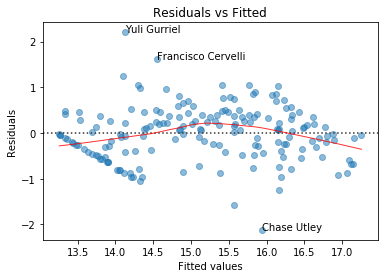

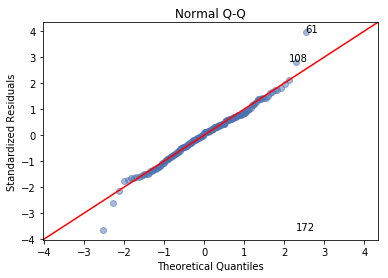

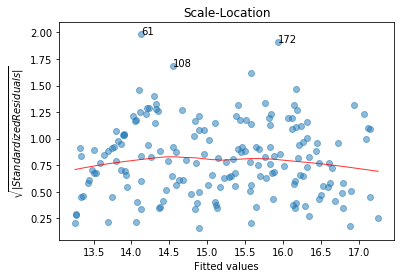

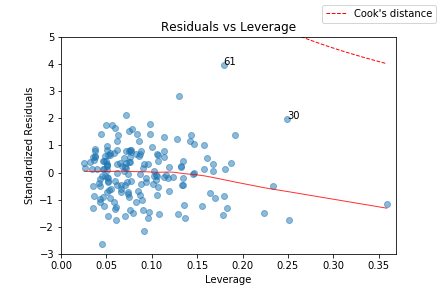

In [636]:
diagnostic_plots.diagnostic_plots(training_df[['Runs','Hits','Doubles','Triples','HR','RBI','BA','OBP','SLG','OPS','SB','TB','SF',
                      'Age','Total_games_played','All_star_count','dWAR']], y_log)

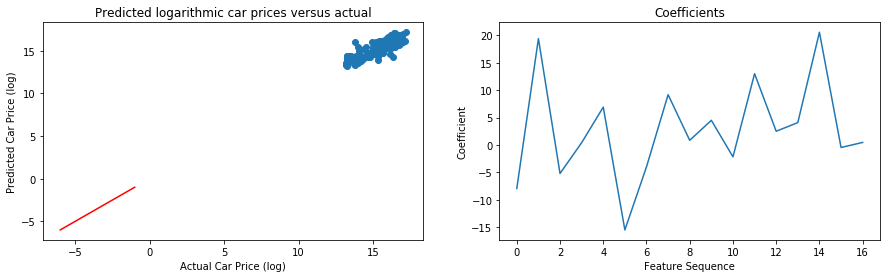

In [637]:
fig = plt.figure(figsize = (15, 4))

#Visualizing predictions versus actuals
y_train_log_predicted = baseball_log.predict(X)

plt.subplot(1, 2, 1)
plt.scatter(y_log, y_train_log_predicted)
plt.plot([-6, -1], [-6, -1], color='red')
plt.title('Predicted logarithmic car prices versus actual')
plt.ylabel('Predicted Car Price (log)')
plt.xlabel('Actual Car Price (log)');

plt.subplot(1, 2, 2)
plt.plot(baseball_log.coef_)
plt.title('Coefficients')
plt.xlabel('Feature Sequence')
plt.ylabel('Coefficient');

In [638]:
## for box cox

from sklearn.metrics import r2_score, mean_squared_error

kf = KFold(n=len(X), n_folds=5, shuffle=True, random_state = 42)

SE_scores = []
r2_scores = []
for train, test in kf:
    X_train = X.iloc[train]
    y_train = y_t.iloc[train]
    X_test = X.iloc[test]
    y_test = y_t.iloc[test]
    baseball_log.fit(X_train, y_train)
    y_test_predict = baseball_log.predict(X_test)
    score = mean_squared_error(inv_boxcox(y_test_predict, lamb), inv_boxcox(y_test, lamb))
    SE = np.sqrt(score)
    SE_scores.append(SE)
    r2 = r2_score(inv_boxcox(y_test_predict, lamb), inv_boxcox(y_test, lamb))
    r2_scores.append(r2)
    
print(np.mean(SE_scores))
print(np.mean(r2_scores))

4368200.021935249
0.3318505642138499


In [639]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 177 entries, Cameron Maybin to Jurickson Profar
Data columns (total 60 columns):
Runs                  177 non-null float64
Hits                  177 non-null float64
Doubles               177 non-null float64
Triples               177 non-null float64
HR                    177 non-null float64
RBI                   177 non-null float64
BA                    177 non-null float64
OBP                   177 non-null float64
SLG                   177 non-null float64
OPS                   177 non-null float64
SB                    177 non-null float64
TB                    177 non-null float64
SF                    177 non-null float64
Age                   177 non-null float64
Total_games_played    177 non-null float64
dWAR                  177 non-null float64
All_star_count        177 non-null float64
First_Base            177 non-null float64
Second_Base           177 non-null float64
Third_Base            177 non-null float64
Shortstop     

In [640]:
#sns.pairplot(pair_df, size=1.2, aspect=1.5)

In [641]:
training_df['rootHits'] = training_df['Hits']**0.5
training_df['rootRBI'] = training_df['RBI']**0.5
training_df['rootTGP'] = training_df['Total_games_played']**0.5

In [642]:
## USE THIS MODEL

y, X = patsy.dmatrices('y_t ~ Hits + Total_games_played + rootASC +'
                       'First_Base + Second_Base + Third_Base + Shortstop + Left_Field +'
                       'Center_Field + Right_Field + Center_Field',
                       data=training_df, return_type="dataframe")

model6 = sm.OLS(y, X)
fit6 = model6.fit()
fit6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    y_t   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     54.27
Date:                Wed, 18 Jul 2018   Prob (F-statistic):           3.73e-47
Time:                        22:17:26   Log-Likelihood:                -896.50
No. Observations:                 177   AIC:                             1815.
Df Residuals:                     166   BIC:                             1850.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            110.3870      9.727     11.348      0.000      91.182     129.592
Hits                 891.4996    184.761      4.825      0.000     526.715    1256.285
Total_games_played  1221.0089    156.272      7.813      0.000     912.472    1529.546
rootASC               49.0160     26.456      1.853      0.066      -3.217     101.249
First_Base            -3.6780     10.721     -0.343      0.732     -24.845      17.489
Second_Base          -36.1760     10.452     -3.461      0.001     -56.811     -15.541
Third_Base           -16.8683     11.998     -1.406      0.162     -40.557       6.820
Shortstop            -14.6377     11.364     -1.288      0.199     -37.074       7.798
Left_Field           -11.0879     11.121     -0.997      0.320     -33.044      10.868
Center_Field         -25.8055     11.588     -2.227      0.027     -48.684      -2.927
Right_Field          -16.8396     11.347     -1.484      0.140     -39.243       5.564
==============================================================================
Omnibus:                        2.059   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.357   Jarque-Bera (JB):                1.853
Skew:                           0.041   Prob(JB):                        0.396
Kurtosis:                       3.494   Cond. No.                         78.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

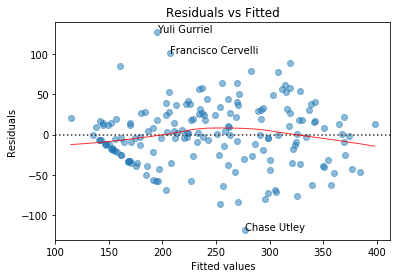

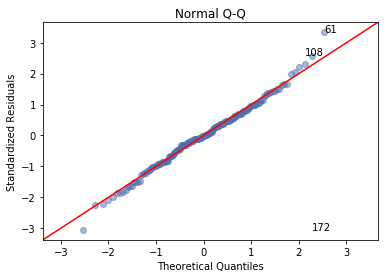

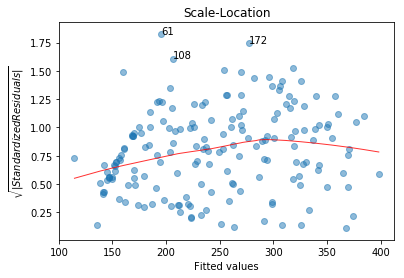

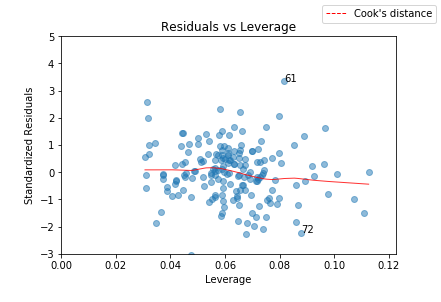

In [643]:
diagnostic_plots.diagnostic_plots(training_df.drop(
    'y_t', axis=1), training_df['y_t'], fit6)

In [644]:
X_exp6 = inv_boxcox(X, 0.279286511856211)
y_exp6 = inv_boxcox(y, 0.279286511856211)

In [645]:
X_train6, X_test6, y_train6, y_test6 = train_test_split(X_exp6, y_exp6, test_size=0.3, random_state=55)

reg6 = LinearRegression()
scores = cross_val_score(reg6, X, y_exp6, cv=10, scoring='r2')
mse_scores = cross_val_score(reg6, X, y_exp6, cv=10, scoring='neg_mean_squared_error')

# Read in the pickle file
print(np.mean(scores))
print(-np.mean(mse_scores))

0.5697109979107229
11929940159808.613


   test_score  train_score  train_size
0    0.228153     0.847668          13
1    0.529280     0.803084          42
2    0.564413     0.715867          72
3    0.562307     0.709456         102
4    0.591186     0.690306         132


(-1, 1)

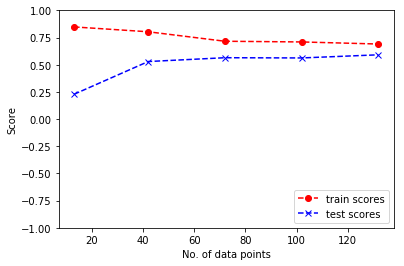

In [646]:
train_sizes, train_scores, test_scores = learning_curve(reg6, X_exp6, y_exp6, cv=4)
ave_train_scores = train_scores.mean(axis=1)
ave_test_scores = test_scores.mean(axis=1)

learn_df = pd.DataFrame({
    'train_size': train_sizes,
    'train_score': ave_train_scores,
    'test_score': ave_test_scores
})
print(learn_df)

plt.plot(learn_df['train_size'], learn_df['train_score'], 'r--o', label='train scores')
plt.plot(learn_df['train_size'], learn_df['test_score'], 'b--x', label='test scores')
plt.xlabel('No. of data points')
plt.ylabel('Score')
plt.legend(loc='lower right')
plt.ylim(-1,1)

In [647]:
from sklearn.metrics import r2_score, mean_squared_error

kf = KFold(n=len(X), n_folds=5, shuffle=True)

SE_scores = []
r2_scores = []
for train, test in kf:
    X_train = X.iloc[train]
    y_train = y.iloc[train]
    X_test = X.iloc[test]
    y_test = y.iloc[test]
    reg5.fit(X_train, y_train)
    y_test_predict = reg5.predict(X_test)
    score = mean_squared_error(inv_boxcox(y_test_predict, 0.279286511856211), inv_boxcox(y_test, 0.279286511856211))
    SE = np.sqrt(score)
    SE_scores.append(SE)
    r2 = r2_score(inv_boxcox(y_test_predict, 0.279286511856211), inv_boxcox(y_test, 0.279286511856211))
    r2_scores.append(r2)
    
print(np.mean(SE_scores))
print(np.mean(r2_scores))

3391038.820597795
0.4431431661470905


In [648]:
## USE THIS MODEL

y, X = patsy.dmatrices('Salary ~ Hits + Total_games_played + rootASC +'
                       'First_Base + Second_Base + Third_Base + Shortstop + Left_Field +'
                       'Center_Field + Right_Field + Center_Field',
                       data=training_df, return_type="dataframe")

model7 = sm.OLS(y, X)
fit7 = model7.fit()
fit7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     34.85
Date:                Wed, 18 Jul 2018   Prob (F-statistic):           8.03e-36
Time:                        22:17:28   Log-Likelihood:                -2937.1
No. Observations:                 177   AIC:                             5896.
Df Residuals:                     166   BIC:                             5931.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -2.682e+06   9.89e+05     -2.713      0.007   -4.63e+06    -7.3e+05
Hits                7.649e+07   1.88e+07      4.074      0.000    3.94e+07    1.14e+08
Total_games_played  7.181e+07   1.59e+07      4.522      0.000    4.05e+07    1.03e+08
rootASC             9.422e+06   2.69e+06      3.505      0.001    4.11e+06    1.47e+07
First_Base          2.553e+05   1.09e+06      0.234      0.815    -1.9e+06    2.41e+06
Second_Base        -4.022e+06   1.06e+06     -3.787      0.000   -6.12e+06   -1.93e+06
Third_Base         -1.573e+06   1.22e+06     -1.290      0.199   -3.98e+06    8.34e+05
Shortstop          -1.317e+06   1.15e+06     -1.141      0.256    -3.6e+06    9.63e+05
Left_Field         -1.011e+06   1.13e+06     -0.895      0.372   -3.24e+06    1.22e+06
Center_Field       -2.757e+06   1.18e+06     -2.341      0.020   -5.08e+06   -4.32e+05
Right_Field        -2.409e+06   1.15e+06     -2.089      0.038   -4.69e+06   -1.32e+05
==============================================================================
Omnibus:                       13.570   Durbin-Watson:                   1.882
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               17.589
Skew:                           0.505   Prob(JB):                     0.000152
Kurtosis:                       4.168   Cond. No.                         78.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

ValueError: Image size of 13691803x15308306 pixels is too large. It must be less than 2^16 in each direction.

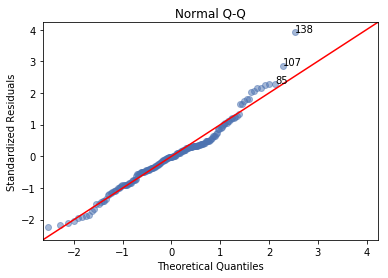

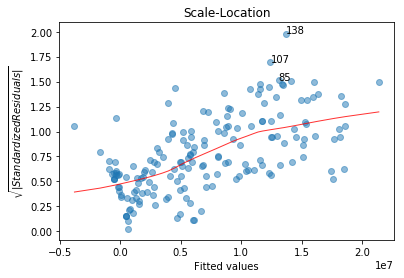

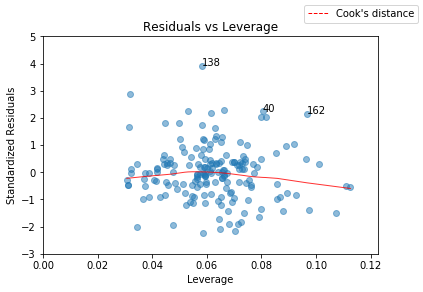

In [649]:
diagnostic_plots.diagnostic_plots(training_df.drop(
    'y_t', axis=1), training_df['y_t'], fit7)

In [650]:
X_train6, X_test6, y_train6, y_test6 = train_test_split(X, y, test_size=0.3, random_state=55)

reg7 = LinearRegression()
scores = cross_val_score(reg7, X, y, cv=10, scoring='r2')
mse_scores = cross_val_score(reg7, X, y, cv=10, scoring='neg_mean_squared_error')

# Read in the pickle file
print(np.mean(scores))
print(-np.mean(mse_scores))

0.5656183918603892
17782689596066.336


   test_score  train_score  train_size
0    0.245649     0.847907          13
1    0.525550     0.795932          42
2    0.560059     0.711610          72
3    0.558891     0.706461         102
4    0.587925     0.687376         132


(-1, 1)

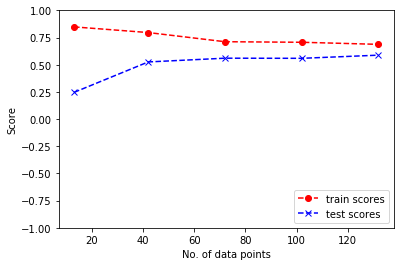

In [651]:
train_sizes, train_scores, test_scores = learning_curve(reg7, X, y, cv=4)
ave_train_scores = train_scores.mean(axis=1)
ave_test_scores = test_scores.mean(axis=1)

learn_df = pd.DataFrame({
    'train_size': train_sizes,
    'train_score': ave_train_scores,
    'test_score': ave_test_scores
})
print(learn_df)

plt.plot(learn_df['train_size'], learn_df['train_score'], 'r--o', label='train scores')
plt.plot(learn_df['train_size'], learn_df['test_score'], 'b--x', label='test scores')
plt.xlabel('No. of data points')
plt.ylabel('Score')
plt.legend(loc='lower right')
plt.ylim(-1,1)

In [652]:
from sklearn.metrics import r2_score, mean_squared_error

kf = KFold(n=len(X), n_folds=5, shuffle=True)

SE_scores = []
r2_scores = []
for train, test in kf:
    X_train = X.iloc[train]
    y_train = y.iloc[train]
    X_test = X.iloc[test]
    y_test = y.iloc[test]
    reg5.fit(X_train, y_train)
    y_test_predict = reg5.predict(X_test)
    score = mean_squared_error(y_test_predict, y_test)
    SE = np.sqrt(score)
    SE_scores.append(SE)
    r2 = r2_score(y_test_predict, y_test)
    r2_scores.append(r2)
    
print(np.mean(SE_scores))
print(np.mean(r2_scores))

4093336.075111511
0.42587593580183347


0.27522614877732177


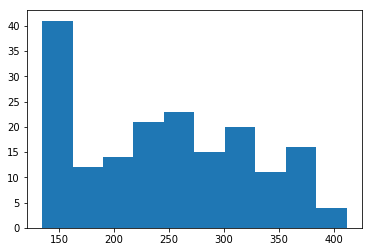

In [653]:
lamb=stats.boxcox_normmax(training_df.Salary, brack=(-1.9, 1.9))
print(lamb)
training_df['y_t'] =(np.power(training_df.Salary,0.27522613935555035)-1)/0.27522613935555035

plt.hist(training_df['y_t']);

In [654]:
### HERE'S MY ACTUAL MODEL

In [655]:
training_df['y_t']

Player_Name
Cameron Maybin       221.557525
Justin Turner        318.982731
Dustin Pedroia       345.565191
Corey Dickerson      262.337738
Khris Davis          307.341388
Jesus Sucre          155.715307
Ben Zobrist          348.535170
DJ LeMahieu          289.771645
Mark Trumbo          322.627852
Ian Kinsler          311.348559
Cory Spangenberg     184.771755
Tyler Flowers        234.801514
Eduardo Escobar      247.787427
Justin Smoak         236.829433
Joe Panik            225.289415
Marwin Gonzalez      251.632911
Ender Inciarte       245.622874
Mike Moustakas       256.642743
Chris Taylor         136.171226
Brian Dozier         294.423840
Tyler Saladino       135.497785
A.J. Ellis           169.483468
Evan Gattis          271.171565
Josh Bell            136.003667
Justin Upton         345.565191
Yadier Molina        367.683443
Dexter Fowler        348.535170
Steven Souza Jr.     227.096793
Matt Kemp            376.355521
Chris Iannetta       227.986672
                        ... 

In [656]:
X, y_t = training_df[['Hits','RBI','OPS','SB',
                      'Total_games_played','rootASC','dWAR','First_Base','Second_Base','Third_Base',
                      'Shortstop','Left_Field','Center_Field','Right_Field','Center_Field','DH']], training_df['y_t']

baseball_log = LinearRegression()
baseball_log_fit = baseball_log.fit(X,y_t)

In [657]:
from sklearn.metrics import r2_score, mean_squared_error

kf = KFold(n=len(X), n_folds=5, shuffle=True, random_state=42)

SE_scores = []
r2_scores = []
for train, test in kf:
    X_train = X.iloc[train]
    y_train = y_t.iloc[train]
    X_test = X.iloc[test]
    y_test = y_t.iloc[test]
    baseball_log.fit(X_train, y_train)
    y_test_predict = baseball_log.predict(X_test)
    score = mean_squared_error(inv_boxcox(y_test_predict, lamb), inv_boxcox(y_test, lamb))
    SE = np.sqrt(score)
    SE_scores.append(SE)
    r2 = r2_score(inv_boxcox(y_test_predict, lamb), inv_boxcox(y_test, lamb))
    r2_scores.append(r2)
    
print(np.mean(SE_scores))
print(np.mean(r2_scores))

4260741.508402252
0.35964318408015095


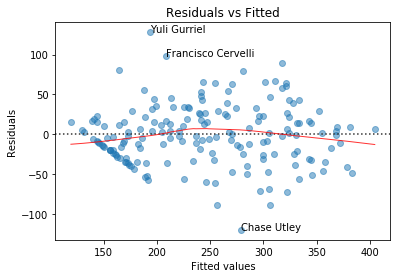

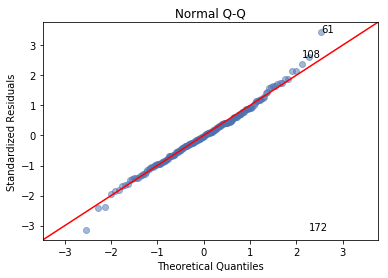

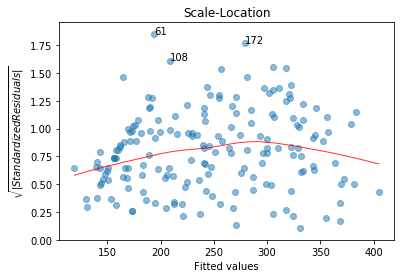

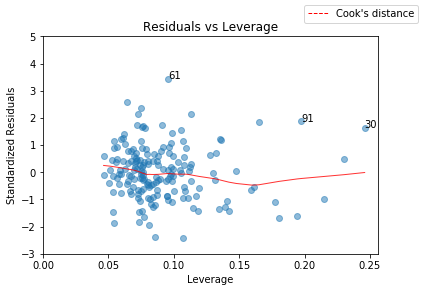

In [658]:
diagnostic_plots.diagnostic_plots(training_df[['Hits','RBI','OPS','SB',
                      'Total_games_played','rootASC','dWAR','First_Base','Second_Base','Third_Base',
                      'Shortstop','Left_Field','Center_Field','Right_Field','Center_Field','DH']], y_t)

   test_score  train_score  train_size
0   -2.140360     0.988332          13
1    0.587900     0.902877          42
2    0.670716     0.810895          72
3    0.705362     0.801279         102
4    0.723193     0.784032         132


(-1, 1)

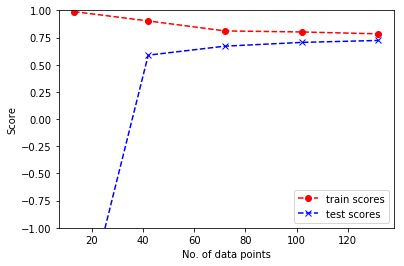

In [659]:
train_sizes, train_scores, test_scores = learning_curve(baseball_log, X, y_t, cv=4)
ave_train_scores = train_scores.mean(axis=1)
ave_test_scores = test_scores.mean(axis=1)

learn_df = pd.DataFrame({
    'train_size': train_sizes,
    'train_score': ave_train_scores,
    'test_score': ave_test_scores
})
print(learn_df)

plt.plot(learn_df['train_size'], learn_df['train_score'], 'r--o', label='train scores')
plt.plot(learn_df['train_size'], learn_df['test_score'], 'b--x', label='test scores')
plt.xlabel('No. of data points')
plt.ylabel('Score')
plt.legend(loc='lower right')
plt.ylim(-1,1)

In [660]:
y, X = patsy.dmatrices('y_t ~ Hits + RBI + SB +'
                       'OPS + Total_games_played + rootASC + dWAR +'
                       'First_Base + Second_Base + Third_Base + Shortstop + Left_Field +'
                       'Center_Field + Right_Field + Center_Field + DH',
                       data=training_df, return_type="dataframe")

model = sm.OLS(y, X)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    y_t   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     37.32
Date:                Wed, 18 Jul 2018   Prob (F-statistic):           1.37e-44
Time:                        22:17:30   Log-Likelihood:                -892.29
No. Observations:                 177   AIC:                             1817.
Df Residuals:                     161   BIC:                             1867.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             54.6645     46.889      1.166      0.245     -37.931     147.260
Hits                1198.7415    313.284      3.826      0.000     580.065    1817.418
RBI                 -414.9333    269.249     -1.541      0.125    -946.648     116.781
SB                  -176.4702     72.583     -2.431      0.016    -319.808     -33.133
OPS                  782.9857    709.939      1.103      0.272    -619.007    2184.978
Total_games_played  1296.3315    165.653      7.826      0.000     969.198    1623.465
rootASC               53.1824     27.955      1.902      0.059      -2.024     108.388
dWAR                  -4.0677     55.873     -0.073      0.942    -114.406     106.271
First_Base            -1.7502     14.531     -0.120      0.904     -30.446      26.946
Second_Base          -27.9463     12.494     -2.237      0.027     -52.620      -3.272
Third_Base           -13.2304     13.506     -0.980      0.329     -39.902      13.441
Shortstop             -6.3454     12.677     -0.501      0.617     -31.380      18.690
Left_Field            -1.8562     13.539     -0.137      0.891     -28.594      24.881
Center_Field          -9.7587     13.938     -0.700      0.485     -37.284      17.767
Right_Field          -10.1823     13.811     -0.737      0.462     -37.456      17.092
DH                    13.6364     17.562      0.776      0.439     -21.045      48.318
==============================================================================
Omnibus:                        3.770   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.152   Jarque-Bera (JB):                4.004
Skew:                           0.154   Prob(JB):                        0.135
Kurtosis:                       3.670   Cond. No.                         261.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

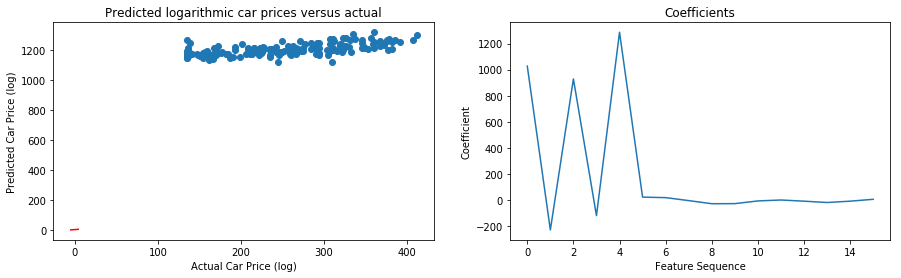

In [661]:
fig = plt.figure(figsize = (15, 4))

#Visualizing predictions versus actuals
y_train_log_predicted = baseball_log.predict(X)

plt.subplot(1, 2, 1)
plt.scatter(training_df['y_t'], y_train_log_predicted)
plt.plot([-5, 4], [0, 4], color='red')
plt.title('Predicted logarithmic car prices versus actual')
plt.ylabel('Predicted Car Price (log)')
plt.xlabel('Actual Car Price (log)');

plt.subplot(1, 2, 2)
plt.plot(baseball_log.coef_)
plt.title('Coefficients')
plt.xlabel('Feature Sequence')
plt.ylabel('Coefficient');

In [662]:
check_out = training_df[['Salary','Hits','Doubles','OPS','SB',
                      'Total_games_played','rootASC','dWAR','First_Base','Second_Base','Third_Base',
                      'Shortstop','Left_Field','Center_Field','Right_Field']]

In [663]:
#sns.pairplot(check_out)

In [796]:
X, y = training_df[['Runs','HR','SB','OPS',
                      'Total_games_played','rootASC','dWAR','Second_Base','Right_Field']], training_df['Salary']

baseball = LinearRegression()
baseball_fit = baseball.fit(X,y)

In [797]:
from sklearn.metrics import r2_score, mean_squared_error

kf = KFold(n=len(X), n_folds=5, shuffle=True, random_state=42)

SE_scores = []
r2_scores = []
for train, test in kf:
    X_train = X.iloc[train]
    y_train = y.iloc[train]
    X_test = X.iloc[test]
    y_test = y.iloc[test]
    baseball.fit(X_train, y_train)
    y_test_predict = baseball.predict(X_test)
    score = mean_squared_error(y_test_predict,y_test)
    SE = np.sqrt(score)
    SE_scores.append(SE)
    r2 = r2_score(y_test_predict,y_test)
    r2_scores.append(r2)

mean_mse = np.mean(SE_scores)
print('Mean MSE', np.mean(SE_scores))
print('Mean R^2',np.mean(r2_scores))
print('Average Salary Error', mean_mse**0.5)

Mean MSE 4059340.095617787
Mean R^2 0.43193008748526285
Average Salary Error 2014.780408783495


   test_score  train_score  train_size
0   -0.123564     0.906010          13
1    0.475617     0.818943          42
2    0.610569     0.717825          72
3    0.628062     0.710590         102
4    0.644753     0.700530         132


(-1, 1)

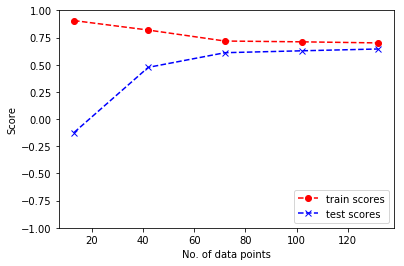

In [798]:
train_sizes, train_scores, test_scores = learning_curve(baseball, X, y, cv=4)
ave_train_scores = train_scores.mean(axis=1)
ave_test_scores = test_scores.mean(axis=1)

learn_df = pd.DataFrame({
    'train_size': train_sizes,
    'train_score': ave_train_scores,
    'test_score': ave_test_scores
})
print(learn_df)

plt.plot(learn_df['train_size'], learn_df['train_score'], 'r--o', label='train scores')
plt.plot(learn_df['train_size'], learn_df['test_score'], 'b--x', label='test scores')
plt.xlabel('No. of data points')
plt.ylabel('Score')
plt.legend(loc='lower right')
plt.ylim(-1,1)

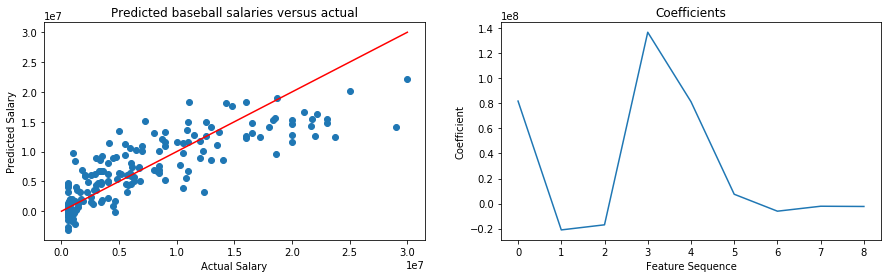

In [791]:
fig = plt.figure(figsize = (15, 4))

#Visualizing predictions versus actuals
y_train_predicted = baseball.predict(X)

plt.subplot(1, 2, 1)
plt.scatter(y, y_train_predicted)
plt.plot([0, 3e7], [0, 3e7], color='red')
plt.title('Predicted baseball salaries versus actual')
plt.ylabel('Predicted Salary')
plt.xlabel('Actual Salary');

plt.subplot(1, 2, 2)
plt.plot(baseball.coef_)
plt.title('Coefficients')
plt.xlabel('Feature Sequence')
plt.ylabel('Coefficient');

In [799]:
y, X = patsy.dmatrices('Salary ~ Runs + HR + OPS + SB + '
                      'Total_games_played + rootASC + dWAR + Second_Base + Right_Field',
                       data=training_df, return_type="dataframe")

model = sm.OLS(y, X)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     42.43
Date:                Wed, 18 Jul 2018   Prob (F-statistic):           1.02e-38
Time:                        23:30:16   Log-Likelihood:                -2931.9
No. Observations:                 177   AIC:                             5884.
Df Residuals:                     167   BIC:                             5916.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -1.177e+07   4.44e+06     -2.652      0.009   -2.05e+07   -3.01e+06
Runs                9.004e+07   2.73e+07      3.294      0.001    3.61e+07    1.44e+08
HR                 -3.091e+07   1.55e+07     -2.000      0.047   -6.14e+07   -3.97e+05
OPS                 1.301e+08   6.66e+07      1.953      0.052   -1.42e+06    2.62e+08
SB                 -2.231e+07   7.36e+06     -3.030      0.003   -3.68e+07   -7.78e+06
Total_games_played  8.251e+07   1.52e+07      5.445      0.000    5.26e+07    1.12e+08
rootASC             9.719e+06   2.66e+06      3.657      0.000    4.47e+06     1.5e+07
dWAR               -5.734e+06   4.46e+06     -1.286      0.200   -1.45e+07    3.07e+06
Second_Base        -2.767e+06   9.09e+05     -3.045      0.003   -4.56e+06   -9.73e+05
Right_Field        -2.305e+06   9.82e+05     -2.346      0.020   -4.24e+06   -3.65e+05
==============================================================================
Omnibus:                       11.962   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               14.877
Skew:                           0.469   Prob(JB):                     0.000588
Kurtosis:                       4.067   Cond. No.                         240.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

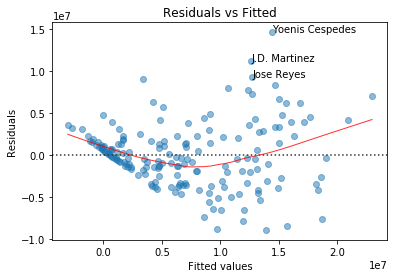

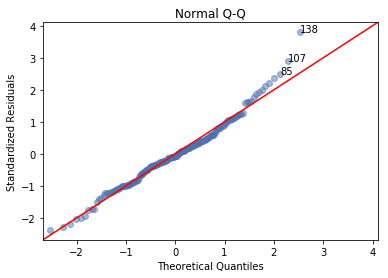

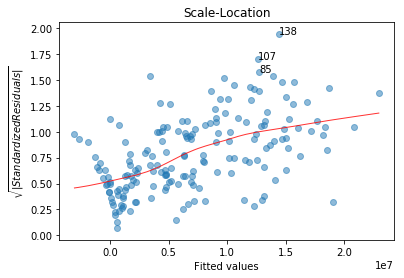

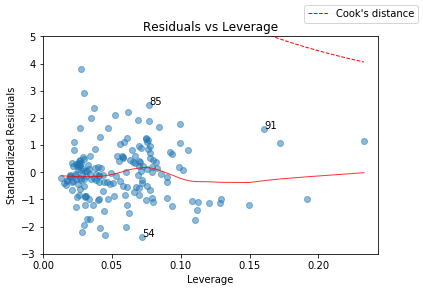

In [800]:
diagnostic_plots.diagnostic_plots(training_df[['Runs','HR','SB','OPS',
                      'Total_games_played','rootASC','dWAR','Second_Base','Right_Field']], training_df['Salary'],fit)

In [801]:
from sklearn import linear_model,ensemble, tree, model_selection, datasets

def get_scores(X, y, folds = 10, alpha = 0.5): 

    models = {}
    parameters = {}
    
    models['linear_model'] = linear_model.LinearRegression()
    models['ridge_model'] = linear_model.Ridge()
    models['lasso_model'] = linear_model.Lasso(alpha=alpha)
    models['robust_regression'] = linear_model.SGDRegressor(loss='huber',max_iter=2000)
    models['eps_insensitive'] = linear_model.SGDRegressor(loss='epsilon_insensitive',max_iter=2000)
    models['cart'] = tree.DecisionTreeRegressor(max_depth=7)
    models['extratrees'] = tree.ExtraTreeRegressor(max_depth=7)
    models['randomForest'] = ensemble.RandomForestRegressor()
    models['adaboostedTrees'] = ensemble.AdaBoostRegressor()
    models['gradboostedTrees'] = ensemble.GradientBoostingRegressor()
    
    score_list = []
    for name,model in models.items():
        scores = model_selection.cross_val_score(model, X, y, 
                                                 cv = folds, n_jobs=1, scoring="r2")  
        score_list.append(np.mean(scores))

    scores_df = pd.DataFrame({'Model': list(models.keys()),
                             'Scores': score_list})

    return scores_df

In [802]:
get_scores(X,y)

/Users/brendenrossin/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/brendenrossin/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/brendenrossin/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/brendenrossin/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d arr

/Users/brendenrossin/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/brendenrossin/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/brendenrossin/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/brendenrossin/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d arr

,Model,Scores
0,linear_model,0.603788
1,ridge_model,0.455561
2,lasso_model,0.603788
3,robust_regression,-1.230471
4,eps_insensitive,-1.230354
5,cart,0.225064
6,extratrees,0.143614
7,randomForest,0.565454
8,adaboostedTrees,0.433601
9,gradboostedTrees,0.522960


In [803]:
bigX, bigy = training_df[['Runs', 'Hits', 'Doubles', 'Triples', 'HR', 'RBI', 'BA', 'OBP', 'SLG',
                                'OPS', 'SB', 'TB', 'SF', 'Age', 'Total_games_played',
                                'dWAR','rootASC','First_Base','Second_Base','Third_Base',
                                'Shortstop','Left_Field','Center_Field','Right_Field','DH']], training_df['Salary']

In [804]:
baseball = LinearRegression()
baseball_fit = baseball.fit(bigX,bigy)

In [805]:
get_scores(bigX,bigy)

/Users/brendenrossin/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/brendenrossin/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/brendenrossin/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/brendenrossin/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: Converge

,Model,Scores
0,linear_model,0.541118
1,ridge_model,0.494261
2,lasso_model,0.541137
3,robust_regression,-1.230476
4,eps_insensitive,-1.230409
5,cart,0.181851
6,extratrees,0.199341
7,randomForest,0.563737
8,adaboostedTrees,0.478813
9,gradboostedTrees,0.494895
